# **Facial Emotion Detection Project**

## **Problem Definition**

**The context:** Facial emotion detection is a growing field which is used in many domains. Research shows that approximately 55% of human communication is conveyed through facial expressions and other visual cues. So the detection of facial emotions is extremely important to build intelligent AI systems which interact with people. The most popular applications are:

1. Personalized smart environments. It can be used in chatbots, car user experience assistants, recommendation systems and many applications alike. As the system can detect human emotions it can build a more human-like experience of interaction, show empathy to the person, provide recommendations that suit the emotional status of the user and thus provide a better user experience.
2. Healthcare. Facial emotion recognition can be used to detect autism, and neurodegenerative diseases, predict psychotic disorders or depression and prevent suicides.
3. Employment. It can help recruiters identify uninterested people during an interview or monitor the moods and attention of employees.
4. Education. It can help monitor the reactions of learners to an educative program and adapt it respectively, detect engagement in an online program.
5. Public safety. It can be used for lie detectors and smart border control systems. Analyse public spaces to detect emotions which can be a sign of a potential terrorist attack. 
6. Crime detection. Facial emotion detection can be used to prevent fraudulent insurance claims or spot shoplifters. 

So we see that Facial emotion recognition is an important problem which can bring value in many domains.
<br>

**The objectives:** Our goal is to develop a model which can identify facial emotions given an image of a human face with high accuracy and thus can be used in respective domains.<br>
**The key questions:**
1. What is the best model and it's architecture which will help us to attain our objectives?
2. What metrics should we use to define what the best model is?
3. What is benchmark performance for this type of the task?  
4. What are the optimal hyperparameters for our model?<br>
**The problem formulation:** In this project we try to find the optimal model based on a Neural Network which can help us detect facial emotions from human face images with high accuracy using data science techniques. 



## **About the dataset**

The data set consists of 3 folders, i.e., 'test', 'train', and 'validation'. 
Each of these folders has four subfolders:

**‘happy’**: Images of people who have happy facial expressions.<br>
**‘sad’**: Images of people with sad or upset facial expressions.<br>
**‘surprise’**: Images of people who have shocked or surprised facial expressions.<br>
**‘neutral’**: Images of people showing no prominent emotion in their facial expression at all.<br>


In [ ]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

### **Loading the data**

In [ ]:
# Storing the path of the data file from the Google drive
path = '/content/drive/MyDrive/Colab Notebooks/Facial Detection/DataSets/Facial_emotion_images.zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Facial_emotion_images/"

## **Visualizing the Classes**

Let's look at our classes. 


### **Happy**

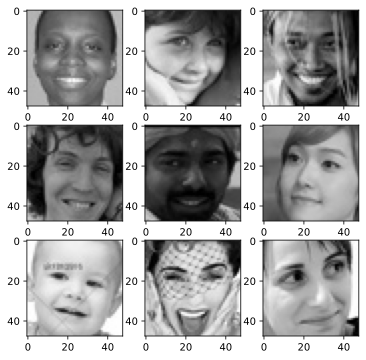

In [ ]:
expression = 'happy'

plt.figure(figsize= (6,6))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: In all of the pictures the people are smiling, we can see open teeth in most of the pictures. The mouth expression is stretched, the lips are narrowed, corners of the lips are raised diagonally, chicks are raised.**

### **Sad**

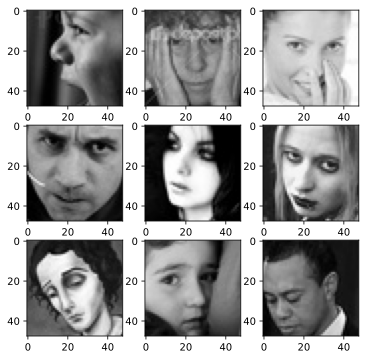

In [ ]:
expression = 'sad'

plt.figure(figsize= (6,6))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: In almost all of the pictures we can't see the teeth,  the lips are sealed, the eyebrows are are contracted towards the nose, in some of the pictures lip corners are pulled down diagonally.**

### **Neutral**

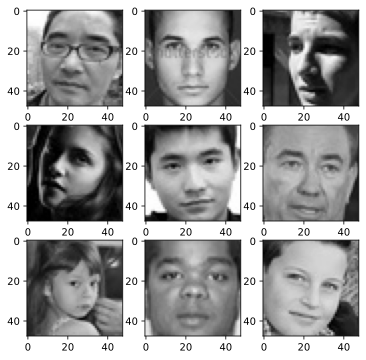

In [ ]:
expression = 'neutral'

plt.figure(figsize= (6,6))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights: We can see that the facial muscles are relaxed and in most of the cases lips corners are horizontal. We can't see the teeth in most of the cases.**

### **Surprised**

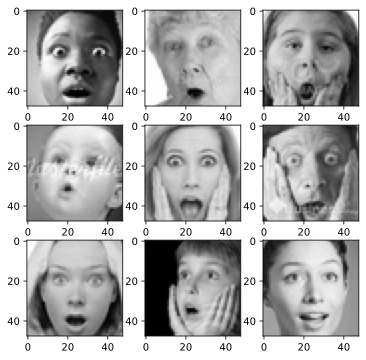

In [ ]:
expression = 'surprise'

plt.figure(figsize= (6,6))
for i in range(1, 10, 1):
    plt.subplot(3, 3, i)

    img = load_img(folder_path + "train/" + expression + "/" +
                  os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    plt.imshow(img)   

plt.show()

**Observations and Insights:We can see that the eyebrows are heightened in all of the cases. In most of the cases the mouth is wide open vertically. The eyes are wide open in most of the pictures as well.**

## **Checking Distribution of Classes**

In [ ]:
# Getting count of images in each folder within our training path
num_happy = len(os.listdir(folder_path + "train/happy"))
print("Number of images in the class 'happy':      ", num_happy)

num_sad = len(os.listdir(folder_path + "train/sad"))
print("Number of images in the class 'sad':        ", num_sad)

num_neutral = len(os.listdir(folder_path + "train/neutral"))
print("Number of images in the class 'neutral':    ", num_neutral)

num_surprise = len(os.listdir(folder_path + "train/surprise"))
print("Number of images in the class 'surprise':   ", num_surprise)

Number of images in the class 'happy':       3976
Number of images in the class 'sad':         3982
Number of images in the class 'neutral':     3978
Number of images in the class 'surprise':    3173


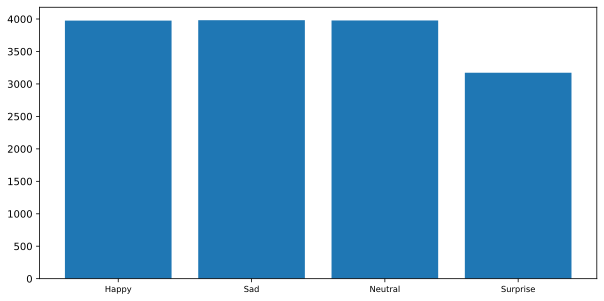

In [ ]:
# Code to plot histogram
plt.figure(figsize = (10, 5))

data = {'Happy': num_happy, 'Sad': num_sad, 'Neutral': num_neutral, 'Surprise' : num_surprise}

df = pd.Series(data)

plt.bar(range(len(df)), df.values, align = 'center')

plt.xticks(range(len(df)), df.index.values, size = 'small')

plt.show()

**Observations and Insights: We can see that the dataset is a bit unbalanced because the Surprise class has ~ 20% less samples inside training data compared to the other classes. So the model can have more difficulties to correctly identify surprise class in test data. The difference is not big though, so it shouldn't affect a model performance in a big way. This analysis is enough to proceed with the modeling.**

## **Creating the Data Loaders**
We will check performance on RGB mode and then switch to GrayScale

In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "rgb",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


## **Modeling**

**The convolutional networks seem to be the best starting approach for our problem as this architecture is dedicated to image recognition and in most cases shows better performance than ANN.**



### **Creating the Base Neural Network**

In [ ]:
# Initializing a Sequential Model
model1 = Sequential()

# CNN structure
model1.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters=32, kernel_size=2,padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

model1.add(Conv2D(filters=32, kernel_size=2,padding='same',activation='relu'))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Dropout(0.2))

# ANN structure
model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.4))

# The Final layer
model1.add(Dense(4,activation='softmax'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 48, 48, 64)        832       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)       

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Model compilation
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Model Training
history = model1.fit(train_set,validation_data=validation_set,epochs=epochs,steps_per_epoch = train_set.n//train_set.batch_size,callbacks=callbacks_list)

Epoch 1/20
472/472 [==============================] - ETA: 0s - loss: 1.3640 - accuracy: 0.3047
Epoch 1: val_accuracy improved from -inf to 0.38397, saving model to ./model1.h5
472/472 [==============================] - 26s 54ms/step - loss: 1.3640 - accuracy: 0.3047 - val_loss: 1.3050 - val_accuracy: 0.3840 - lr: 0.0010
Epoch 2/20
471/472 [============================>.] - ETA: 0s - loss: 1.2286 - accuracy: 0.4475
Epoch 2: val_accuracy improved from 0.38397 to 0.52843, saving model to ./model1.h5
472/472 [==============================] - 24s 51ms/step - loss: 1.2283 - accuracy: 0.4474 - val_loss: 1.1380 - val_accuracy: 0.5284 - lr: 0.0010
Epoch 3/20
471/472 [============================>.] - ETA: 0s - loss: 1.1376 - accuracy: 0.4996
Epoch 3: val_accuracy improved from 0.52843 to 0.56219, saving model to ./model1.h5
472/472 [==============================] - 25s 53ms/step - loss: 1.1374 - accuracy: 0.4996 - val_loss: 1.0411 - val_accuracy: 0.5622 - lr: 0.0010
Epoch 4/20
471/472 [=====

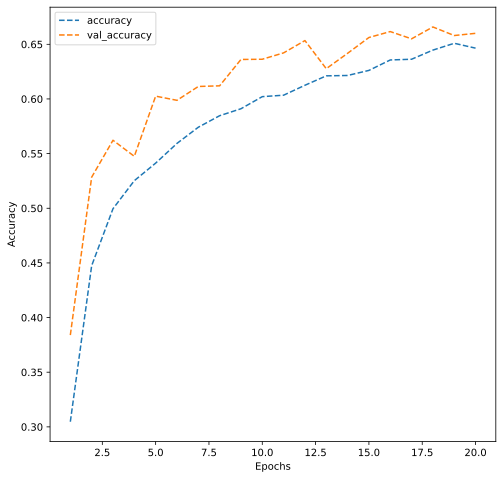

In [ ]:
# Lets plot graphs for the training and validation accuracies

dict_hist = history.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (8, 8))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [ ]:
# Let's create a dictionary to collect final validation accuracies by each model
# to compare the models
dict_val_acc={}
dict_val_acc['Val Accuracy RGB model 1']=dict_hist['val_accuracy'][-1]

### **Evaluating the Model on the Test Set**

In [ ]:
test_images,test_labels=next(test_set)
accuracy = model1.evaluate(test_images, test_labels, verbose = 1)
print('\n', 'Test_Accuracy:-', accuracy[1])

1/1 [==============================] - 0s 142ms/step - loss: 0.6792 - accuracy: 0.7188

 Test_Accuracy:- 0.71875


**Observations and Insights: Resulting test accuracy is very close to the validation and training accuracies, the model is not overfitting. Test and validation accuracies are even higher than training accuracy. Probably we should try to increase model complexity and try to use some other regularization techniques.**

### **Creating the second Convolutional Neural Network**

In [ ]:
# Creating sequential model
model2 = Sequential()

# first convolutional block 
model2.add(Conv2D(filters=256,kernel_size=2,padding='same',input_shape=(48,48,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))

# second convolutional block
model2.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))


# third convolutional block
model2.add(Conv2D(filters=64,kernel_size=2, padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))

# fourth convolutional block
model2.add(Conv2D(filters=32,kernel_size=2, padding='same',activation='relu'))
model2.add(BatchNormalization())
model2.add(LeakyReLU(0.1))
model2.add(MaxPooling2D(pool_size=2))

# Flatten layer
model2.add(Flatten())

# Dense layers
model2.add(Dense(512,activation='relu'))
model2.add(Dense(128,activation='relu'))

# The final layer
model2.add(Dense(4,activation='softmax'))
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 256)       3328      
                                                                 
 batch_normalization_4 (Batc  (None, 48, 48, 256)      1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_5 (Batc  (None, 24, 24, 128)     

### **Compiling and Training the Model**


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True) 

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model2.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.2905 - accuracy: 0.3810
Epoch 1: val_accuracy improved from -inf to 0.41551, saving model to ./model2.h5
473/473 [==============================] - 27s 56ms/step - loss: 1.2905 - accuracy: 0.3810 - val_loss: 1.3014 - val_accuracy: 0.4155 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.1040 - accuracy: 0.5075
Epoch 2: val_accuracy improved from 0.41551 to 0.53506, saving model to ./model2.h5
473/473 [==============================] - 26s 55ms/step - loss: 1.1035 - accuracy: 0.5078 - val_loss: 1.0552 - val_accuracy: 0.5351 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 0.9785 - accuracy: 0.5751
Epoch 3: val_accuracy improved from 0.53506 to 0.55837, saving model to ./model2.h5
473/473 [==============================] - 27s 58ms/step - loss: 0.9785 - accuracy: 0.5751 - val_loss: 1.0424 - val_accuracy: 0.5584 - lr: 0.0010
Epoch 4/20
472/473 [=====

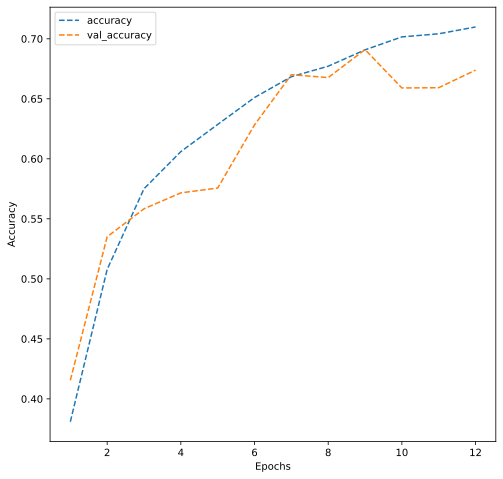

In [ ]:
dict_hist = history.history

list_ep = [i for i in range(1,13)]

plt.figure(figsize=(8,8))

plt.plot(list_ep, dict_hist['accuracy'],ls='--',label='accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'],ls='--',label='val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [ ]:
# Let's add achieved final validation accuracy to the dictionary
dict_val_acc['Val Accuracy RGB model 2']=dict_hist['val_accuracy'][-1]

### **Evaluating the Model on the Test Set**

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy = model2.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-', accuracy[1])

1/1 [==============================] - 0s 181ms/step - loss: 0.9827 - accuracy: 0.7500

 Test_Accuracy:- 0.75


**Observations and Insights: We faced early stopping as validation accuracy started to drop. The model is slightly overfitting because validation accuracy is ~3% lower than train accuracy.  Accuracy on the test set is at the same time is even higher than training accuracy. This model shows slightly better overall performance  than the previous one.**

## **Let's try the GrayScale mode**

In [ ]:
# Let's build new data sets

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

datagen_test = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range=(0.,2.),
                                    rescale=1./255,
                                    shear_range=0.3)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
# Initializing a Sequential Model
model3 = Sequential()

# CNN structure
model3.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu',input_shape=(48,48,1)))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=32, kernel_size=2,padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

model3.add(Conv2D(filters=32, kernel_size=2,padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# ANN structure
model3.add(Flatten())
model3.add(Dense(512,activation='relu'))
model3.add(Dropout(0.4))

# The Final layer
model3.add(Dense(4,activation='softmax'))

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 48, 48, 64)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 24, 24, 32)        8224      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 12, 12, 32)       

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
# Model compilation
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Model Training
history = model3.fit(train_set,validation_data=validation_set,epochs=epochs,steps_per_epoch = train_set.n//train_set.batch_size,callbacks=callbacks_list)

Epoch 1/20
471/472 [============================>.] - ETA: 0s - loss: 1.3399 - accuracy: 0.3278
Epoch 1: val_accuracy improved from -inf to 0.47378, saving model to ./model1.h5
472/472 [==============================] - 17s 34ms/step - loss: 1.3399 - accuracy: 0.3279 - val_loss: 1.2004 - val_accuracy: 0.4738 - lr: 0.0010
Epoch 2/20
471/472 [============================>.] - ETA: 0s - loss: 1.1812 - accuracy: 0.4787
Epoch 2: val_accuracy improved from 0.47378 to 0.54370, saving model to ./model1.h5
472/472 [==============================] - 16s 34ms/step - loss: 1.1813 - accuracy: 0.4787 - val_loss: 1.0755 - val_accuracy: 0.5437 - lr: 0.0010
Epoch 3/20
472/472 [==============================] - ETA: 0s - loss: 1.1038 - accuracy: 0.5139
Epoch 3: val_accuracy improved from 0.54370 to 0.54491, saving model to ./model1.h5
472/472 [==============================] - 16s 33ms/step - loss: 1.1038 - accuracy: 0.5139 - val_loss: 1.0625 - val_accuracy: 0.5449 - lr: 0.0010
Epoch 4/20
472/472 [=====

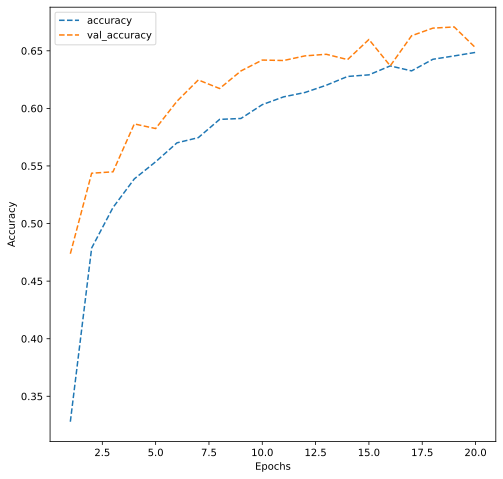

In [ ]:
dict_hist = history.history

list_ep = [i for i in range(1,21)]

plt.figure(figsize=(8,8))

plt.plot(list_ep, dict_hist['accuracy'],ls='--',label='accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'],ls='--',label='val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [ ]:
# Let's add achieved final validation accuracy to the dictionary
dict_val_acc['Val Accuracy GrayScale model 1']=dict_hist['val_accuracy'][-1]

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy = model3.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-', accuracy[1])

1/1 [==============================] - 0s 21ms/step - loss: 0.8567 - accuracy: 0.7188

 Test_Accuracy:- 0.71875


**Observations and Insights:  The validation and training accuracies are very close, the model is not overfitting. Test accuracy is even higher than training and validation accuracies. Performance is very close to the same model architecture using RGB. At the same time training the model in GrayScale was twice faster. Let's check GrayScale performance with the second architecture.**

In [ ]:
# Creating sequential model
model4 = Sequential()

# first convolutional block 
model4.add(Conv2D(filters=256,kernel_size=2,padding='same',input_shape=(48,48,1),activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))

# second convolutional block
model4.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))


# third convolutional block
model4.add(Conv2D(filters=64,kernel_size=2, padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))

# fourth convolutional block
model4.add(Conv2D(filters=32,kernel_size=2, padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))

# Flatten layer
model4.add(Flatten())

# Dense layers
model4.add(Dense(512,activation='relu'))
model4.add(Dense(128,activation='relu'))

# The final layer
model4.add(Dense(4,activation='softmax'))
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 48, 48, 256)       1280      
                                                                 
 batch_normalization_8 (Batc  (None, 48, 48, 256)      1024      
 hNormalization)                                                 
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 48, 48, 256)       0         
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 24, 24, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 128)       131200    
                                                                 
 batch_normalization_9 (Batc  (None, 24, 24, 128)     

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model2.h5", monitor='val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True) 

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

epochs = 20

In [ ]:
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model4.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.2796 - accuracy: 0.3871
Epoch 1: val_accuracy improved from -inf to 0.42013, saving model to ./model2.h5
473/473 [==============================] - 20s 39ms/step - loss: 1.2798 - accuracy: 0.3873 - val_loss: 1.2987 - val_accuracy: 0.4201 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.0641 - accuracy: 0.5301
Epoch 2: val_accuracy improved from 0.42013 to 0.51698, saving model to ./model2.h5
473/473 [==============================] - 18s 38ms/step - loss: 1.0640 - accuracy: 0.5299 - val_loss: 1.0778 - val_accuracy: 0.5170 - lr: 0.0010
Epoch 3/20
472/473 [============================>.] - ETA: 0s - loss: 0.9485 - accuracy: 0.5905
Epoch 3: val_accuracy improved from 0.51698 to 0.59393, saving model to ./model2.h5
473/473 [==============================] - 18s 38ms/step - loss: 0.9485 - accuracy: 0.5905 - val_loss: 0.9556 - val_accuracy: 0.5939 - lr: 0.0010
Epoch 4/20
472/473 [=====

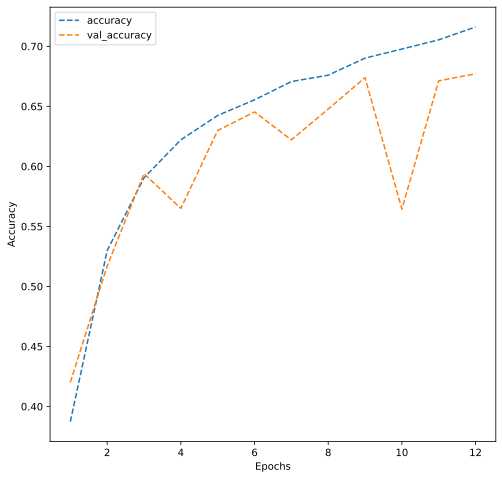

In [ ]:
dict_hist = history.history

list_ep = [i for i in range(1,13)]

plt.figure(figsize=(8,8))

plt.plot(list_ep, dict_hist['accuracy'],ls='--',label='accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'],ls='--',label='val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

In [ ]:
# Let's add achieved final validation accuracy to the dictionary
dict_val_acc['Val Accuracy GrayScale model 2']=dict_hist['val_accuracy'][-1]

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy = model4.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-', accuracy[1])

1/1 [==============================] - 0s 28ms/step - loss: 0.7332 - accuracy: 0.7188

 Test_Accuracy:- 0.71875


**Observations and Insights: We faced early stopping as validation accuracy started to drop. The model is slightly overfitting because validation accuracy is ~4% lower than train accuracy.  Accuracy on the test set is at the same time is even higher than training accuracy. Overall performance of the model is very close to the performance with RGB. At the same time training the model in GrayScale was twice faster.**

In [ ]:
# Let's check the final dictionary with validation accuracies by both models
# in both color modes

dict_val_acc

{'Val Accuracy RGB model 1': 0.6600361466407776,
 'Val Accuracy RGB model 2': 0.6738999485969543,
 'Val Accuracy GrayScale model 1': 0.652601957321167,
 'Val Accuracy GrayScale model 2': 0.677114725112915}

**We see that:**



*   We choose to compare the models by validation accuracy, because all of the classes are equally important to us and validation accuracy is quite robust metric to compare different NN models. 
*   CNN Architecture 2 shows slightly higher validation accuracy, but faces early stopping.  That means that if we continued to train Architecture 1 we could possibly achieve the same or even higher accuracy. At the same time accuracy of both Architectures shows no significant difference between RGB and GrayScale mode. Probably the difference in accuracy that we see between the color modes is explained more by the difference in initialization and not by superiority of the color mode, as the difference is less than 0.8% and looks random. It seems logical because the images are GrayScale, so RGB mode doesn't add any meaningful information.  Since GrayScale mode takes approximately half time of the training in RGB mode we stick to GrayScale mode.  
* The best validation accuracy we have achieved is 67.71% which is very close to the human accuracy of 72% in identifying facial emotions confirmed by research. At the same time it's very far from the accuracy achieved by the state of the art models as the highest accuracy achieved so far is 90.4% by ResNet18 with ARM. Probably the both models are too simplistic and use too small dataset for the training.




### <u>**Proposed Approach**</u>


*   Use transfer learning approach and try more sophisticated state of the art pretrained models like ResNet, VGG16, Efficient Net. 
*   Try XGboost algorithm as the final classificator instead of ANN. As CNN + XGboost reportedly can show a very good performance.
* Experiment with hyperparameters to achieve highest possible model performance 
* As the measure of success we will use final validation accuracy before a model starts to overfit as all of the classes are equally important to us and validation accuracy is quite robust metric to compare different NN models. 



## **Importing the Libraries**

In [ ]:
import zipfile
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Importing Deep Learning Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras import applications as ap

import warnings
warnings.filterwarnings('ignore')

## **Transfer Learning Architectures**

In this section, I will create several Transfer Learning architectures. For the pre-trained models, we will select three popular architectures namely, VGG16, ResNet v2, and Efficient Net. The difference between these architectures and the previous architectures is that these will require 3 input channels while the earlier ones worked on 'grayscale' images. Therefore, we will need to create new DataLoaders.

## **VGG16 Model**

### **Importing the VGG16 Architecture**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model

vgg = VGG16(include_top = False, weights = 'imagenet', input_shape = (48, 48, 3))
vgg.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                              

### **Model Building**


In [ ]:
transfer_layer = vgg.get_layer('block5_pool')
vgg.trainable = False

# Adding classification layers on top of it  

# Flattenning the output from the 5th block of the VGG16 model
x = Flatten()(transfer_layer.output)

# Adding a Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Adding a Dense Layer with 128 neurons
x=Dense(128,activation='relu')(x)

# Adding a DropOut layer with Drop out ratio of 0.3
x=Dropout(0.3)(x)

# Adding a Dense Layer with 64 neurons
x=Dense(64,activation='relu')(x)

# Adding a Batch Normalization layer
x=BatchNormalization()(x)

# Adding the final dense layer with 4 neurons and use 'softmax' activation
pred = Dense(4, activation='softmax')(x)

vggmodel = Model(vgg.input, pred) # Initializing the model

## **Creating the Data Loaders**

In [ ]:
# Let's figure out what is the number of test pictures
test_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'test'))

# Let's import the inputs preprocessing function for VGG16
preproc_func_vgg16=ap.vgg16.preprocess_input

# Let's set batch size for train and validation sets
batch_size  = 32
img_size = 48

# Let's create the datasets

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = None,
                                   preprocessing_function=preproc_func_vgg16,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = None,
                                    preprocessing_function=preproc_func_vgg16,
                                    shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_test = ImageDataGenerator(rescale = None,
                                  preprocessing_function=preproc_func_vgg16) 

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = test_image_count,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

checkpoint = ModelCheckpoint("./vggmodel_corr.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0,
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)
csv_logger=CSVLogger('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/vgg16_corr_training.csv',append=False)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate,csv_logger]

epochs = 20

In [ ]:
# Model compilation
vggmodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = vggmodel.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.3090 - accuracy: 0.4029
Epoch 1: val_accuracy improved from -inf to 0.48443, saving model to ./vggmodel_corr.h5
473/473 [==============================] - 40s 60ms/step - loss: 1.3090 - accuracy: 0.4031 - val_loss: 1.1647 - val_accuracy: 0.4844 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.1864 - accuracy: 0.4646
Epoch 2: val_accuracy improved from 0.48443 to 0.49910, saving model to ./vggmodel_corr.h5
473/473 [==============================] - 29s 61ms/step - loss: 1.1860 - accuracy: 0.4648 - val_loss: 1.1356 - val_accuracy: 0.4991 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1516 - accuracy: 0.4876
Epoch 3: val_accuracy did not improve from 0.49910
473/473 [==============================] - 28s 59ms/step - loss: 1.1516 - accuracy: 0.4876 - val_loss: 1.1527 - val_accuracy: 0.4909 - lr: 0.0010
Epoch 4/20
473/473 [========================

In [ ]:
vggmodel.save('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/vgg16_corr')

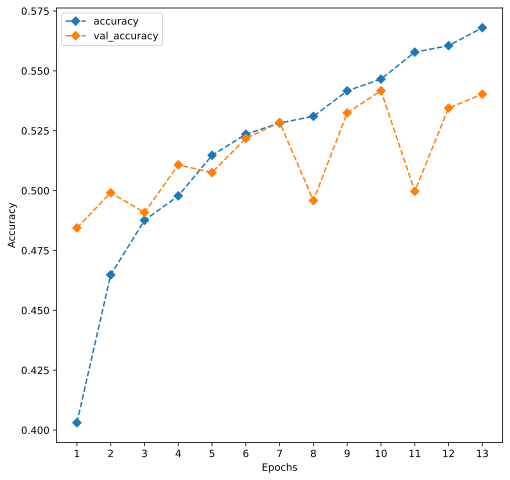

In [ ]:
dict_hist=history.history
list_ep=[i for i in range(1,len(history.epoch)+1)]
plt.figure(figsize=(8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls='--',label='accuracy',marker='D')
plt.plot(list_ep,dict_hist['val_accuracy'],ls='--',label='val_accuracy',marker='D')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(list_ep)
plt.legend()
plt.show()

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy = vggmodel_corr.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

4/4 [==============================] - 0s 11ms/step - loss: 1.0526 - accuracy: 0.5625

 Test_Accuracy:- 0.5625


              precision    recall  f1-score   support

       happy       0.51      0.72      0.60        32
         sad       0.53      0.53      0.53        32
     neutral       0.46      0.41      0.43        32
    surprise       0.83      0.59      0.69        32

    accuracy                           0.56       128
   macro avg       0.58      0.56      0.56       128
weighted avg       0.58      0.56      0.56       128



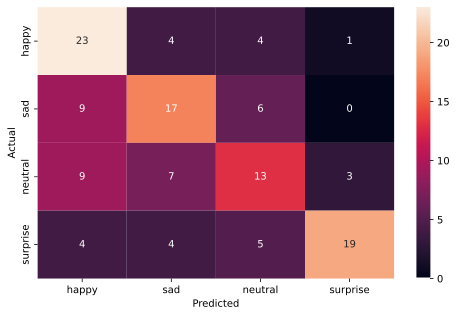

In [ ]:
pred = vggmodel.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

We can see that:

1. The model faced early stopping on 13th epoch, because it started to overfit in earlier epochs. The model state from the 10th epoch where the best results were achieved was saved.  
2. The training accuracy is constantly growing, but validation accuracy started to fall at  the 11th epoch and didn't recover in the further epochs to its best value of 0.5417 what caused early stopping.
3. Training and validation accuracies are very close and test accuracy is even slightly higher. The model is not overfitting. 
4. At the same time performance of the model is inferior to the results we achieved in previous simple CNN models (0.6771 validation accuracy). 
5. From the classification report we see that the best F1 score of 0.69 is achieved on surprice class and the worst one F1 score of 0.43 is achieved on neutral class. Intuitively it makes sense because surprise looks like the strongest facial expression among the others and neutral looks like the most subtle. 
6. From the confusion matrix we see that happy is equally misclassified with the neutral and sad expressions and almost never with surprise. What probably means that the model is having hard time to identify features of more subtle facial expressions than surprise. 
7. Sad class is misclassified only with happy and neutral and never with surprise. What brings us to the same conclusion as above. 
8. Neutral class also mostly misclassified with sad and happy. 
9. Surprise is equally misclassified with all other classes. 
10. At the same time model is the most accurate on this class even despite this class being 20% smaller in training dataset compared to the others. Both 9 and 10 points support the idea that the model is having hard time to identify features of more subtle facial expressions than surprise.

## **ResNet 101 Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model

Resnet = ap.ResNet101(include_top = False, weights = "imagenet", input_shape=(48,48,3))
Resnet.summary()

171458560/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                       

### **Model Building**


In [ ]:
transfer_layer_Resnet = Resnet.get_layer('conv5_block3_add')
Resnet.trainable=False

# Adding classification layers on top of it

# Flattenning the output from the 3rd block of the VGG16 model
x = Flatten()(transfer_layer_Resnet.output)

# Dense layer with 256 neurons
x = Dense(256, activation = 'relu')(x)

# Dense Layer with 128 neurons
x = Dense(128,activation='relu')(x)

# DropOut layer with Drop out ratio of 0.3
x = Dropout(0.3)(x)

# Dense Layer with 64 neurons
x = Dense(64,activation='relu')(x)

# Batch Normalization layer
x= BatchNormalization()(x)

# Final dense layer with 4 neurons and use a 'softmax' activation
pred = Dense(4, activation = 'softmax')(x)

resnetmodel = Model(Resnet.input, pred) # Initializing the model

### **Let's Build Data Loaders with preprocessing needed**

In [ ]:
# Let's figure out what is the number of test pictures
test_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'test'))

# Let's assign preprocessing function for the model inputs

preproc_func_resnet=ap.resnet50.preprocess_input

# Let's set batch size for train and validation sets
batch_size  = 32
img_size = 48

# Let's create the datasets

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = None,
                                   preprocessing_function=preproc_func_resnet,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = None,
                                    preprocessing_function=preproc_func_resnet,
                                    shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_test = ImageDataGenerator(rescale = None,
                                  preprocessing_function=preproc_func_resnet)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = test_image_count,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,CSVLogger

checkpoint = ModelCheckpoint("./Resnetmodel_corr.h5", monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')

early_stopping = EarlyStopping(monitor ='val_accuracy',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights = True) 

reduce_learningrate = ReduceLROnPlateau(monitor = 'val_accuracy',
                                        factor = 0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)
csv_logger=CSVLogger('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/resnet101_corr_training.csv', append=False)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate,csv_logger]

epochs = 20

In [ ]:
# Model compilation
resnetmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = resnetmodel.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.3206 - accuracy: 0.3808
Epoch 1: val_accuracy improved from -inf to 0.51457, saving model to ./Resnetmodel_corr.h5
473/473 [==============================] - 43s 76ms/step - loss: 1.3202 - accuracy: 0.3810 - val_loss: 1.1181 - val_accuracy: 0.5146 - lr: 0.0010
Epoch 2/20
472/473 [============================>.] - ETA: 0s - loss: 1.1634 - accuracy: 0.4760
Epoch 2: val_accuracy did not improve from 0.51457
473/473 [==============================] - 32s 67ms/step - loss: 1.1637 - accuracy: 0.4757 - val_loss: 1.1565 - val_accuracy: 0.4756 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1096 - accuracy: 0.5080
Epoch 3: val_accuracy did not improve from 0.51457
473/473 [==============================] - 32s 67ms/step - loss: 1.1096 - accuracy: 0.5080 - val_loss: 1.1248 - val_accuracy: 0.4856 - lr: 0.0010
Epoch 4/20
473/473 [==============================] - ETA: 0s - loss: 1.0928 - ac

In [ ]:
resnetmodel.save('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/resnet101_corr')

### **Evaluating the ResNet Model**

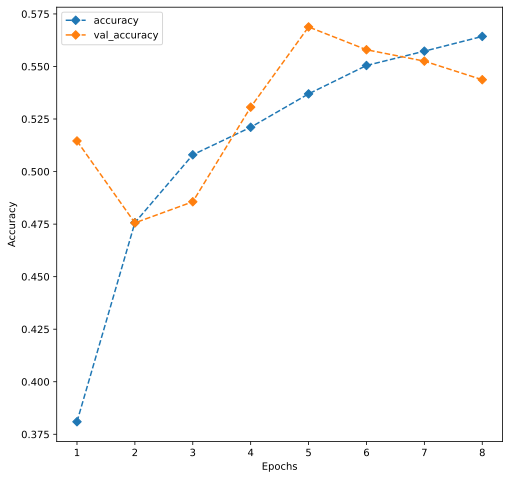

In [ ]:
dict_hist=history.history
list_ep=[i for i in range(1,len(history.epoch)+1)]
plt.figure(figsize=(8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls='--',label='accuracy',marker='D')
plt.plot(list_ep,dict_hist['val_accuracy'],ls='--',label='val_accuracy',marker='D')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(list_ep)
plt.legend()
plt.show()

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy = resnetmodel_corr.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

4/4 [==============================] - 2s 29ms/step - loss: 0.9781 - accuracy: 0.5781

 Test_Accuracy:- 0.578125


              precision    recall  f1-score   support

       happy       0.52      0.84      0.64        32
         sad       0.58      0.59      0.58        32
     neutral       0.41      0.28      0.33        32
    surprise       0.90      0.59      0.72        32

    accuracy                           0.58       128
   macro avg       0.60      0.58      0.57       128
weighted avg       0.60      0.58      0.57       128



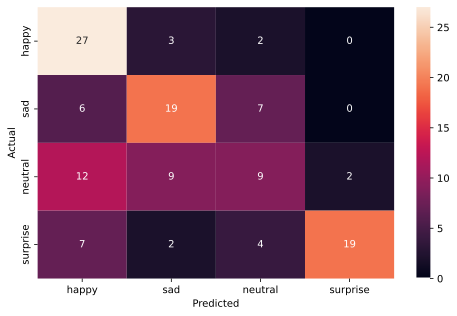

In [ ]:
pred = resnetmodel_corr.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

We can see that:

1. The model faced early stopping on 8th epoch, because it started to overfit in earlier epochs. The model state from the 5th epoch where the best results were achieved was saved.  
2. The training accuracy is constantly growing, but validation accuracy started to fall at  the 6th epoch and didn't recover in the further epochs to its best value of 0.5688 what caused early stopping.
3. The test and validation accuracies are higher than the training accuracy, the model is not overfitting. Probably if we set higher patience for the early stopping we could achieve slightly better results. 
4. At the same time performance of the model is inferior to the results we achieved with simple CNN models (0.6771 validation accuracy). 
5. From the classification report we see that the best F1 score of 0.72 is achieved on surprice class and the worst one F1 score of 0.33 is achieved on neutral class. Intuitively it makes sense because surprise looks like the strongest facial expression among the others and neutral looks like the most subtle. The same story was with the vgg16 model. 
6. From the confusion matrix we see that happy is equally misclassified with the neutral and sad expressions and almost never with surprise. What probably means that the model is having hard time to identify features of more subtle facial expressions than surprise. 
7. Sad class is misclassified only with happy and neutral and never with surprise. What brings us to the same conclusion as above. 
8. Neutral class also mostly misclassified with sad and happy. 
9. Points 7-9 correspond very well with the conclusions made for the vgg16 model. 
10. Unlike it was with vgg16 surprise is most misclassified with happy and least with sad. Probably resnet model captures features a little bit better because happy faces and surprised faces often have open mouth what makes them more similar compared to sad and neutral faces.  
11. At the same time model is the most accurate on this class even despite this class being 20% smaller in training dataset compared to the others. What supports the idea that the model is having hard time to identify features of more subtle facial expressions than surprise.

## **EfficientNet Model**

In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNet = ap.EfficientNetV2B2(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNet.summary()

35848192/35839040 [==============================] - 0s 0us/step
Model: "efficientnetv2-b2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_3[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 48, 48, 3)    0           ['rescaling[0][0]']              
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['normalization[0][0]']          
                 

In [ ]:
# Let's figure out what is the number of test pictures
test_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'test'))

# Let's set batch size for train and validation sets
batch_size  = 32
img_size = 48

# Let's create the datasets

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = None,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = None,
                                    shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_test = ImageDataGenerator(rescale = None)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = test_image_count,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**


In [ ]:
transfer_layer_EfficientNet = EfficientNet.get_layer('block6e_expand_activation')
EfficientNet.trainable = False

# Add your Flatten layer.
x=Flatten()(transfer_layer_EfficientNet.output)

# Add your Dense layers and/or BatchNormalization and Dropout layers
x=Dense(512,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(512,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(256,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(128,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)

# Add your final Dense layer with 4 neurons and softmax activation function.
pred=Dense(4,activation='softmax')(x)

Efficientnetmodel = Model(EfficientNet.input, pred)

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,CSVLogger

checkpoint = ModelCheckpoint("./Efficientnetmodel_corr.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

csv_logger=CSVLogger('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/Efficientnet_corr_training.csv',append=True)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate,csv_logger]

epochs = 20

In [ ]:
# Let's compile the model
Efficientnetmodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history =Efficientnetmodel.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks_list)

Epoch 1/20
472/473 [============================>.] - ETA: 0s - loss: 1.2878 - accuracy: 0.4474
Epoch 1: val_accuracy improved from -inf to 0.53848, saving model to ./Efficientnetmodel_corr.h5
473/473 [==============================] - 41s 69ms/step - loss: 1.2873 - accuracy: 0.4475 - val_loss: 1.0625 - val_accuracy: 0.5385 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.0929 - accuracy: 0.5294
Epoch 2: val_accuracy improved from 0.53848 to 0.55033, saving model to ./Efficientnetmodel_corr.h5
473/473 [==============================] - 30s 63ms/step - loss: 1.0929 - accuracy: 0.5294 - val_loss: 1.0555 - val_accuracy: 0.5503 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.0411 - accuracy: 0.5556
Epoch 3: val_accuracy improved from 0.55033 to 0.57866, saving model to ./Efficientnetmodel_corr.h5
473/473 [==============================] - 30s 63ms/step - loss: 1.0411 - accuracy: 0.5556 - val_loss: 0.9834 - val_accurac

In [ ]:
Efficientnetmodel.save('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/Efficientnet_corr')

### **Evaluating the EfficientnetNet Model**

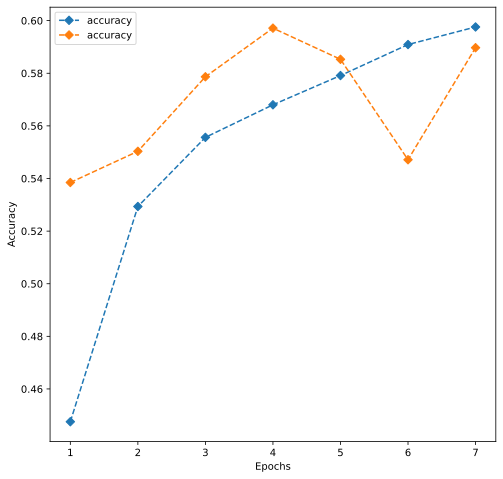

In [ ]:
# Let's see how the model is learning
dict_hist=history.history
list_ep=[i for i in range(1,len(history.epoch)+1)]
plt.figure(figsize=(8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls='--',label='accuracy',marker='D')
plt.plot(list_ep,dict_hist['val_accuracy'],ls='--',label='accuracy',marker='D')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(list_ep)
plt.legend()
plt.show()

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy=Efficientnetmodel_corr.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

4/4 [==============================] - 2s 18ms/step - loss: 0.8760 - accuracy: 0.6172

 Test_Accuracy:- 0.6171875


              precision    recall  f1-score   support

       happy       0.61      0.72      0.66        32
         sad       0.58      0.59      0.58        32
     neutral       0.45      0.41      0.43        32
    surprise       0.86      0.75      0.80        32

    accuracy                           0.62       128
   macro avg       0.62      0.62      0.62       128
weighted avg       0.62      0.62      0.62       128



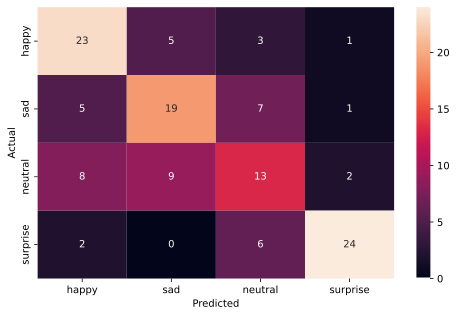

In [ ]:
pred = Efficientnetmodel_corr.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

We can see that:

1. The model faced early stopping on 7th epoch, because validation accuracy started to drop in earlier epochs. The model state from the 4th epoch where the best results were achieved was saved.  
2. The training accuracy is constantly growing, but validation accuracy started to fall at the 5th epoch and didn't recover in the further epochs to its best value of 0.5971 what caused early stopping. 
3. Validation accuracy is slightly higher than the training accuracy and test accuracy is even higher than validation accuracy. The model is not overfitting. Probably if we set early stopping patience to higher value we could achieve slightly better results.  
4. At the same time performance of the model is inferior to the results we achieved with simple CNN models (0.6771 validation accuracy). 
5. From the classification report we see that the best F1 score of 0.80 is achieved on surprice class and the worst one F1 score of 0.43 is achieved on neutral class. Intuitively it makes sense because surprise looks like the strongest facial expression among the others and neutral looks like the most subtle. 
6. From the confusion matrix we see that happy is mostly misclassified with the neutral and sad expressions and almost never with surprise. What probably means that the model is having hard time to identify features of more subtle facial expressions than surprise. 
7. Sad class is also mostly misclassified with happy and neutral and almost never with surprise. What brings us to the same conclusion as above. 
8. Neutral class is also mostly misclassified with sad and happy. 
9. The surprise class is mostly misclassified with neutral class and never with sad class which is very different from the results of vgg16 and resnet. 
10. At the same time model is the most accurate on this class even despite this class being 20% smaller in training dataset compared to the others. That supports the idea that the model is having hard time to identify features of more subtle facial expressions than surprise.

**We see that:**



*   All the pretrained models failed to achieve the performance of all of the simple CNN models build from scratch previously. 
*   Probably the reason is that this models are pretrained on RGB images and our images are Gray Scale. 
* Another probable reason is that our images are a lot smaller than the images in ImageNet (48x48 vs 224x224)
* Also the interesting observation is that top-1 accuracy (https://keras.io/api/applications/) of each model seems to correlate with the results we achieved on our dataset. The higher the top-1 accuracy of the model the better the performance on our dataset was achieved. Or probably higher performance on the efficient net was achieved due to the better ANN classifier used, as we used a different more regularized classifier in efficient net compared to  vgg16 and resnet. 



## **Let's build transfer learning with the most accurate pretrained model available - EfficientNetV2L (85.7% top-1 accuracy on ImageNet).**

In [ ]:
# Let's figure out what is the number of test pictures
test_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'test'))

# Let's set batch size for train and validation sets
batch_size  = 32
img_size = 48

# Let's create the datasets

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = None,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = None,
                                    shear_range = 0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_test = ImageDataGenerator(rescale = None)

test_set = datagen_test.flow_from_directory(folder_path + "test",
                                              target_size = (img_size, img_size),
                                              color_mode = 'rgb',
                                              batch_size = test_image_count,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
import tensorflow as tf
import tensorflow.keras.applications as ap
from tensorflow.keras import Model
EfficientNetV2L = ap.EfficientNetV2L(include_top=False,weights="imagenet", input_shape= (48, 48, 3))

EfficientNetV2L.summary()

473186304/473176280 [==============================] - 3s 0us/step
Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling (Rescaling)          (None, 48, 48, 3)    0           ['input_1[0][0]']                
                                                                                                  
 stem_conv (Conv2D)             (None, 24, 24, 32)   864         ['rescaling[0][0]']              
                                                                                                  
 stem_bn (BatchNormalization)   (None, 24, 24, 32)   128         ['stem_conv[0][0]']              
                

In [ ]:
transfer_layer_EfficientNetV2L = EfficientNetV2L.get_layer('top_activation')
EfficientNetV2L.trainable = False

# Flatten layer.
x=Flatten()(transfer_layer_EfficientNetV2L.output)

# Dense layers with BatchNormalization and Dropout layers
x=Dense(512,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(512,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(256,activation='relu')(x)
x=BatchNormalization()(x)
x=Dense(128,activation='relu')(x)
x=BatchNormalization()(x)
x=Dropout(0.5)(x)
x=Dense(64,activation='relu')(x)
x=BatchNormalization()(x)

# Final Dense layer with 4 neurons and softmax activation function.
pred=Dense(4,activation='softmax')(x)

EfficientnetV2Lmodel = Model(EfficientNetV2L.input, pred)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,CSVLogger

checkpoint = ModelCheckpoint("./EfficientnetV2Lmodel.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor='val_accuracy',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)

csv_logger=CSVLogger('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/EfficientnetV2L_training.csv',append=True)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate,csv_logger]

epochs = 20

In [ ]:
# Let's compile the model
EfficientnetV2Lmodel.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history =EfficientnetV2Lmodel.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks_list)

Epoch 1/20
473/473 [==============================] - ETA: 0s - loss: 1.3362 - accuracy: 0.4014
Epoch 1: val_accuracy improved from -inf to 0.50352, saving model to ./EfficientnetV2Lmodel.h5
473/473 [==============================] - 94s 131ms/step - loss: 1.3362 - accuracy: 0.4014 - val_loss: 1.1404 - val_accuracy: 0.5035 - lr: 0.0010
Epoch 2/20
473/473 [==============================] - ETA: 0s - loss: 1.1567 - accuracy: 0.4928
Epoch 2: val_accuracy improved from 0.50352 to 0.54008, saving model to ./EfficientnetV2Lmodel.h5
473/473 [==============================] - 55s 116ms/step - loss: 1.1567 - accuracy: 0.4928 - val_loss: 1.0811 - val_accuracy: 0.5401 - lr: 0.0010
Epoch 3/20
473/473 [==============================] - ETA: 0s - loss: 1.1084 - accuracy: 0.5187
Epoch 3: val_accuracy improved from 0.54008 to 0.54611, saving model to ./EfficientnetV2Lmodel.h5
473/473 [==============================] - 55s 116ms/step - loss: 1.1084 - accuracy: 0.5187 - val_loss: 1.0514 - val_accuracy: 

In [ ]:
EfficientnetV2Lmodel.save('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/EfficientnetV2L')

### **Evaluating the EfficientnetNet Model**

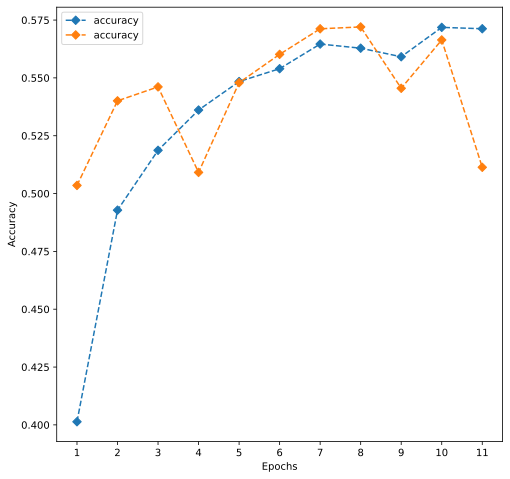

In [ ]:
# Let's see how the model is learning
dict_hist=history.history
list_ep=[i for i in range(1,len(history.epoch)+1)]
plt.figure(figsize=(8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls='--',label='accuracy',marker='D')
plt.plot(list_ep,dict_hist['val_accuracy'],ls='--',label='accuracy',marker='D')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(list_ep)
plt.legend()
plt.show()

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy=EfficientnetV2Lmodel.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

4/4 [==============================] - 6s 82ms/step - loss: 0.9306 - accuracy: 0.6172

 Test_Accuracy:- 0.6171875


              precision    recall  f1-score   support

       happy       0.67      0.62      0.65        32
         sad       0.58      0.66      0.62        32
     neutral       0.45      0.44      0.44        32
    surprise       0.77      0.75      0.76        32

    accuracy                           0.62       128
   macro avg       0.62      0.62      0.62       128
weighted avg       0.62      0.62      0.62       128



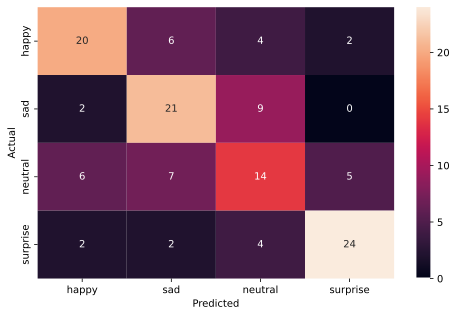

In [ ]:
pred = EfficientnetV2Lmodel.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Insights and observations:**

*   Unfortunately for the EfficientnetV2L we achieved slightly worse 
performance than for EfficientnetV2B2. This doesn't support the idea that  
the better Top-1 Accuracy on ImageNet the pretrained model has the better will be performance on our dataset.
*   The results of the model show  overall very similar behaviour to the previous ones.
*   We conclude that poor performance for transfer learning is achieved due to 
    these probable reasons:
      - We have Gray Scale images and the pretrained models were trained on RGB images what gives irrelevant set of features and causes negative learning effect compared to more basic CNN models built from scratch.
      - Our images are a lot smaller than the images in ImageNet (48x48 vs 224x224)




## **Building a Complex Neural Network Architecture from scratch**

We see that Transfer Learning approach has failed, so let's try to build more complex CNN from scratch to push performance further.

## **Creating the Data Loaders**


In [ ]:
batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                    brightness_range = (0., 2.),
                                    rescale = 1./255,
                                    shear_range = 0.3)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                        brightness_range=(0.,2.),
                                        rescale=1./255,
                                        shear_range=0.3)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size= (img_size,img_size),
                                                        color_mode ='grayscale',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad','neutral','surprise'],
                                                        shuffle = True)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_path + 'test',
                                            target_size= (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size=test_image_count,
                                            class_mode = 'categorical',
                                            classes = ['happy','sad','neutral','surprise'],
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


### **Model Building**

In [ ]:
no_of_classes = 4

model3 = Sequential()

# 1st CNN Block
model3.add(Conv2D(filters=64,kernel_size=2,padding='same',input_shape=(48,48,1),activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# 2nd CNN Block
model3.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
# 3rd CNN Block
model3.add(Conv2D(filters=512,kernel_size=2,padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
# 4th CNN Block
model3.add(Conv2D(filters=512,kernel_size=2,padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))
# 5th CNN Block
model3.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(LeakyReLU(0.1))
model3.add(MaxPooling2D(pool_size=2))
model3.add(Dropout(0.2))

# ANN Classificator
model3.add(Flatten())

# First fully connected layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

# Second fully connected layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.2))

model3.add(Dense(no_of_classes, activation = 'softmax'))

### **Compiling and Training the Model**

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 35

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model3.h5", monitor = 'val_accuracy',
                            save_weights_only = True, mode = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.1, patience = 2, min_lr = 0.0001 , mode = 'max')

csv_logger=CSVLogger('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model3_training.csv',append=False)

callbacks = [checkpoint, reduce_lr,csv_logger]

In [ ]:
# Let's compile the model
model3.compile(loss='categorical_crossentropy',optimizer=Adam(0.003),metrics=['accuracy'])

In [ ]:
history = model3.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks)

Epoch 1/35
473/473 [==============================] - ETA: 0s - loss: 1.4456 - accuracy: 0.2907
Epoch 1: saving model to model3.h5
473/473 [==============================] - 18s 34ms/step - loss: 1.4456 - accuracy: 0.2907 - val_loss: 1.3672 - val_accuracy: 0.3060 - lr: 0.0030
Epoch 2/35
473/473 [==============================] - ETA: 0s - loss: 1.2637 - accuracy: 0.3905
Epoch 2: saving model to model3.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.2637 - accuracy: 0.3905 - val_loss: 1.2391 - val_accuracy: 0.4342 - lr: 0.0030
Epoch 3/35
472/473 [============================>.] - ETA: 0s - loss: 1.1532 - accuracy: 0.4798
Epoch 3: saving model to model3.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.1529 - accuracy: 0.4802 - val_loss: 1.1515 - val_accuracy: 0.4607 - lr: 0.0030
Epoch 4/35
472/473 [============================>.] - ETA: 0s - loss: 1.0665 - accuracy: 0.5251
Epoch 4: saving model to model3.h5
473/473 [=============================

In [ ]:
# let's save the model 
model3.save('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model3')

### **Evaluating the Model on the Test Set**

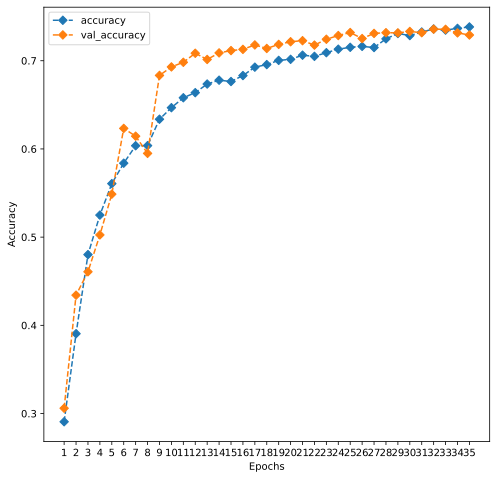

In [ ]:
dict_hist=history.history
list_ep=[i for i in range(1,len(history.epoch)+1)]
plt.figure(figsize=(8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls='--',label='accuracy',marker='D')
plt.plot(list_ep,dict_hist['val_accuracy'],ls='--',label='val_accuracy',marker='D')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.xticks(list_ep)
plt.legend()
plt.show()

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy=model3.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

4/4 [==============================] - 0s 6ms/step - loss: 0.6343 - accuracy: 0.7578

 Test_Accuracy:- 0.7578125


              precision    recall  f1-score   support

       happy       0.84      0.84      0.84        32
         sad       0.68      0.66      0.67        32
     neutral       0.63      0.69      0.66        32
    surprise       0.90      0.84      0.87        32

    accuracy                           0.76       128
   macro avg       0.76      0.76      0.76       128
weighted avg       0.76      0.76      0.76       128



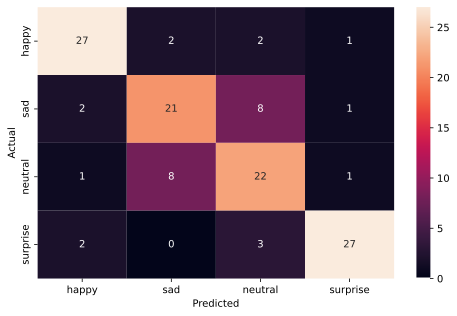

In [ ]:
pred = model3.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

We see that:

1. The model is not overfitting because validation accuracy is very close to the training accuracy, at the same time the test accuracy even higher. 
2. The performance of the model improved immensely compared to the best results we got from with simple CNN models: 72.92% vs 67.71%. 
3. From the classification report we see that best F1 performance is achieved on the happy and surprise classes and the performance on the sad and neutral classes is worse but still a lot better than for previous models we trained. 
4. The biggest confusion for the model is caused by the sad and neutral classes, because the model confuses this classes to each other the most.
5. Training accuracy was constantly growing, at the same time validation accuracy dropped only slightly for the last 2 epochs. Probably if we continued to train the model we could achieve better performance. Let's try this approach with slight variation of hyperparameters. 

### **Let's try to train the model for more epochs with higher patience and lower minimal learning rate**

In [ ]:
no_of_classes = 4

model4 = Sequential()

# 1st CNN Block
model4.add(Conv2D(filters=64,kernel_size=2,padding='same',input_shape=(48,48,1),activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))

# 2nd CNN Block
model4.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))
# 3rd CNN Block
model4.add(Conv2D(filters=512,kernel_size=2,padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))
# 4th CNN Block
model4.add(Conv2D(filters=512,kernel_size=2,padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))
# 5th CNN Block
model4.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model4.add(BatchNormalization())
model4.add(LeakyReLU(0.1))
model4.add(MaxPooling2D(pool_size=2))
model4.add(Dropout(0.2))

# The ANN Classificator
model4.add(Flatten())

# First fully connected layer
model4.add(Dense(256))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.2))

# Second fully connected layer
model4.add(Dense(256))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dropout(0.2))

model4.add(Dense(no_of_classes, activation = 'softmax'))

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger

epochs = 100

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model4.h5", monitor = 'val_accuracy',
                            save_weights_only = True, mode = 'max', verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.1, patience = 5, min_lr = 0.00001 , mode = 'max')

csv_logger=CSVLogger('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model4_training.csv',append=False)

callbacks = [checkpoint, reduce_lr,csv_logger]

In [ ]:
model4.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.005),metrics=['accuracy'])

In [ ]:
history=model4.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks)

Epoch 1/100
473/473 [==============================] - ETA: 0s - loss: 1.4676 - accuracy: 0.2677
Epoch 1: saving model to model4.h5
473/473 [==============================] - 36s 48ms/step - loss: 1.4676 - accuracy: 0.2677 - val_loss: 1.3740 - val_accuracy: 0.3209 - lr: 0.0050
Epoch 2/100
473/473 [==============================] - ETA: 0s - loss: 1.3823 - accuracy: 0.2877
Epoch 2: saving model to model4.h5
473/473 [==============================] - 23s 49ms/step - loss: 1.3823 - accuracy: 0.2877 - val_loss: 1.3434 - val_accuracy: 0.3006 - lr: 0.0050
Epoch 3/100
473/473 [==============================] - ETA: 0s - loss: 1.3081 - accuracy: 0.3520
Epoch 3: saving model to model4.h5
473/473 [==============================] - 24s 50ms/step - loss: 1.3081 - accuracy: 0.3520 - val_loss: 1.2839 - val_accuracy: 0.3524 - lr: 0.0050
Epoch 4/100
473/473 [==============================] - ETA: 0s - loss: 1.2545 - accuracy: 0.3856
Epoch 4: saving model to model4.h5
473/473 [=========================

In [ ]:
# let's save the model 
model4.save('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model4')

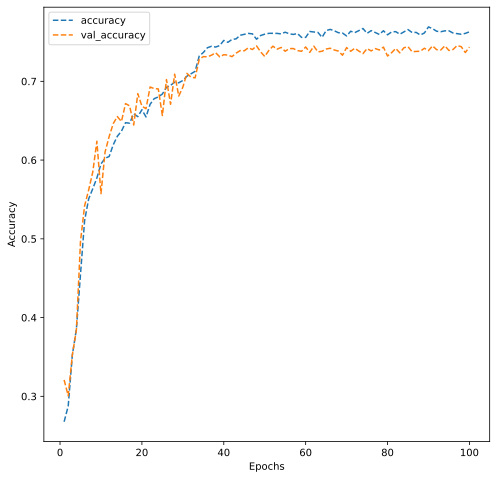

In [ ]:
dict_hist=history.history
list_ep=[i for i in range(1,len(history.epoch)+1)]
plt.figure(figsize=(8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls='--',label='accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls='--',label='val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy=model4.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

4/4 [==============================] - 0s 8ms/step - loss: 0.5420 - accuracy: 0.7812

 Test_Accuracy:- 0.78125


              precision    recall  f1-score   support

       happy       0.85      0.88      0.86        32
         sad       0.67      0.69      0.68        32
     neutral       0.70      0.72      0.71        32
    surprise       0.93      0.84      0.89        32

    accuracy                           0.78       128
   macro avg       0.79      0.78      0.78       128
weighted avg       0.79      0.78      0.78       128



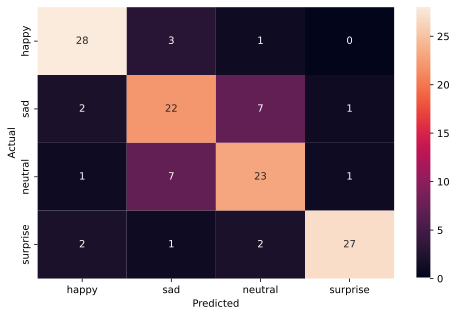

In [ ]:
pred = model4.predict(test_images)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

We see that:

1. The new model is not overfitting because validation accuracy is just slightly lower than the training accuracy, at the same time the test accuracy is higher than the training accuracy. 
2. The performance of the model improved compared to the model 3:  74.34 vs 72.92%.  
3. Training and validation accuracies were growing till ~50 epoch and than started to slightly oscilate around the same values.  
4. The behaviour on the classification report and the confusion matrix is very similar to the model 3. 
5. We achieved validation accuracy which is very close to the top 1 benchmark result achieved on a very similar dataset FER2013 by "Ensemble ResMaskingNet with 6 other CNNs": 74.34% (our) vs 76.82% (top 1 benchmark). And even higher than top 4 result: 74.14% (https://paperswithcode.com/sota/facial-expression-recognition-on-fer2013). So the performance is sutisfactory.
6. Nevertheless let's see if we can achieve a little better results by tweaking hyperparameters. 


### **Let's first tweak the data augmentation**

In [ ]:
# Let's figure out what is the number of test pictures
test_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'test'))

batch_size  = 32
img_size = 48

datagen_train = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip= True,
                                    brightness_range = (0., 3.),
                                    rotation_range=25, 
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                    rescale = 1./255,
                                    shear_range = 0.3,
                                   zoom_range=0.15)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = True)


datagen_validation = ImageDataGenerator(horizontal_flip = True,
                                   vertical_flip= True,
                                    brightness_range = (0., 3.),
                                    rotation_range=25, 
                                   width_shift_range=0.15,
                                   height_shift_range=0.15,
                                    rescale = 1./255,
                                    shear_range = 0.3,
                                   zoom_range=0.15)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size= (img_size,img_size),
                                                        color_mode ='grayscale',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad','neutral','surprise'],
                                                        shuffle = True)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_path + 'test',
                                            target_size= (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size=test_image_count,
                                            class_mode = 'categorical',
                                            classes = ['happy','sad','neutral','surprise'],
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
# Let's create a new model with added layers and stronger regularization

no_of_classes = 4

model5 = Sequential()

#  1st CNN Block
model5.add(Conv2D(filters=64,kernel_size=2,padding='same',input_shape=(48,48,1),activation='relu'))
model5.add(BatchNormalization())
model5.add(LeakyReLU(0.1))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.5))

#  2nd CNN Block
model5.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model5.add(BatchNormalization())
model5.add(LeakyReLU(0.1))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.5))
#  3rd CNN Block
model5.add(Conv2D(filters=512,kernel_size=2,padding='same',activation='relu'))
model5.add(BatchNormalization())
model5.add(LeakyReLU(0.1))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.5))
#  4th CNN Block
model5.add(Conv2D(filters=512,kernel_size=2,padding='same',activation='relu'))
model5.add(BatchNormalization())
model5.add(LeakyReLU(0.1))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.5))

#  5th CNN Block
model5.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
model5.add(BatchNormalization())
model5.add(LeakyReLU(0.1))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Dropout(0.5))

# The ANN Classificator
model5.add(Flatten())

# First fully connected layer
model5.add(Dense(256))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.3))

# Second fully connected layer
model5.add(Dense(256))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.3))

# Third fully connected layer
model5.add(Dense(128))
model5.add(BatchNormalization())
model5.add(Activation('relu'))
model5.add(Dropout(0.3))

model5.add(Dense(no_of_classes, activation = 'softmax'))

In [ ]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger,EarlyStopping

epochs = 100

steps_per_epoch = train_set.n//train_set.batch_size
validation_steps = validation_set.n//validation_set.batch_size

checkpoint = ModelCheckpoint("model5.h5", monitor = 'val_accuracy',
                            save_best_only=True, mode = 'max', verbose = 1)

early_stopping = EarlyStopping(monitor='val_accuracy',
                               min_delta=0,
                               patience=10,
                               verbose=1,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', factor = 0.1, patience = 5, min_lr = 0.00001 , mode = 'max')

csv_logger=CSVLogger('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model5_training.csv',append=False)

callbacks = [checkpoint, reduce_lr,csv_logger,early_stopping]

In [ ]:
model5.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.005),metrics=['accuracy'])

In [ ]:
history=model5.fit(train_set,validation_data=validation_set,epochs=epochs,callbacks=callbacks)

Epoch 1/100
472/473 [============================>.] - ETA: 0s - loss: 1.4421 - accuracy: 0.2659
Epoch 1: val_accuracy improved from -inf to 0.23066, saving model to model5.h5
473/473 [==============================] - 28s 35ms/step - loss: 1.4419 - accuracy: 0.2659 - val_loss: 1.4189 - val_accuracy: 0.2307 - lr: 0.0050
Epoch 2/100
473/473 [==============================] - ETA: 0s - loss: 1.3858 - accuracy: 0.2664
Epoch 2: val_accuracy improved from 0.23066 to 0.25718, saving model to model5.h5
473/473 [==============================] - 16s 34ms/step - loss: 1.3858 - accuracy: 0.2664 - val_loss: 1.3736 - val_accuracy: 0.2572 - lr: 0.0050
Epoch 3/100
473/473 [==============================] - ETA: 0s - loss: 1.3814 - accuracy: 0.2661
Epoch 3: val_accuracy improved from 0.25718 to 0.36086, saving model to model5.h5
473/473 [==============================] - 16s 33ms/step - loss: 1.3814 - accuracy: 0.2661 - val_loss: 1.3641 - val_accuracy: 0.3609 - lr: 0.0050
Epoch 4/100
472/473 [=======

In [ ]:
# let's save the model 
model5.save('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model5')

In [ ]:
# Let's evaluate model's test performance
test_images,test_labels=next(test_set)
accuracy=model5.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

4/4 [==============================] - 0s 6ms/step - loss: 1.3839 - accuracy: 0.2656

 Test_Accuracy:- 0.265625


**Observations and Insights:**

Unfortunately we see that the performance of the model failed, probably due to heavy data augmentation.

## **Let's do one more attempt to achieve better performance than the model 4 by using XGBoost as the final classifier instead of ANN.**

In [ ]:
# Let's load the earlier saved model 4
from tensorflow import keras
model4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model4')

In [ ]:
# Let's see the model summary to choose a layer for intermediate model
# to connect with XGBoost
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
# Let's create intermediate model

intermediate_layer_model = Model(inputs=model4.input,
                                 outputs=model4.get_layer('dense_3').output)

intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 48, 48, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0     

In [ ]:
# Let's create datasets for the model. 

# Let's figure out what is the number of test pictures
test_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'test'))
train_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'train'))

batch_size=32

img_size = 48

datagen_train = ImageDataGenerator(rescale = 1./255)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = False)


datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size= (img_size,img_size),
                                                        color_mode ='grayscale',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad','neutral','surprise'],
                                                        shuffle = False)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_path + 'test',
                                            target_size= (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size=test_image_count,
                                            class_mode = 'categorical',
                                            classes = ['happy','sad','neutral','surprise'],
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
# Let's create outputs on the intermediate model to feed to XGBoost
intermediate_output=intermediate_layer_model.predict(train_set)

In [ ]:
intermediate_output=pd.DataFrame(data=intermediate_output)

In [ ]:
# Let's check the intermediate output
intermediate_output

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,5.799787,-0.867225,-26.017677,5.219923,2.886110,7.572069,-13.639708,3.878557,3.843500,-16.391233,...,2.035530,2.770886,5.889526,-22.041212,-1.284610,-6.219868,-3.574503,2.287618,-15.119143,-2.815572
1,-78.704353,-75.598206,34.984001,1.260047,-101.515640,-86.975929,-37.721321,-21.048925,10.000986,-47.662235,...,2.601296,-7.097738,-46.414085,6.888260,-40.206944,59.636005,-45.563549,64.836319,-63.427467,51.120972
2,-42.578552,-73.032616,12.305219,-24.547104,-53.795902,-54.469341,-43.344421,-14.628231,6.251421,-33.250519,...,14.574936,-2.642499,-69.849419,17.048901,-12.208355,52.740223,-42.991440,26.603374,-70.048218,-8.569519
3,-15.157745,-17.923840,9.667524,0.020379,-18.143461,-25.775581,-11.382079,-1.030839,3.058178,-4.626091,...,-3.581802,-1.397567,-9.685002,4.217752,-11.901306,18.135406,-5.589415,11.124277,-9.494690,8.211908
4,-38.000607,-76.890144,10.541101,-0.935161,-57.398335,-59.820629,-73.740700,-11.325030,32.752434,-39.399605,...,15.725128,3.631092,-50.003662,6.639267,-12.487746,53.973629,-70.413399,43.226822,-93.555115,-6.408666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15104,-35.262840,-50.011978,4.513647,-61.587696,12.811800,-65.858612,4.677186,31.764824,-52.038044,27.495331,...,-61.555721,-15.467643,-52.659164,10.301134,10.432403,46.471382,29.568869,-88.306831,0.830091,-36.395847
15105,-95.609024,-144.206024,7.189331,-144.179413,36.378815,-133.164505,27.124842,75.974083,-129.124557,39.793304,...,-137.378723,-27.898085,-131.392288,19.595289,22.703358,100.099930,82.257851,-202.202499,0.317381,-133.472809
15106,-102.440826,-129.576324,18.341961,-130.110245,32.359901,-144.124069,22.944780,46.989807,-137.849976,10.911811,...,-90.648621,-27.177694,-120.779335,32.181969,26.434034,96.868942,75.207001,-156.101501,3.087758,-78.104584
15107,-130.463028,-160.802582,15.218560,-167.022339,29.713192,-173.506729,43.134987,82.382561,-167.901398,32.064011,...,-148.149582,-27.045347,-148.330719,52.470917,25.586746,102.376884,97.175339,-208.110504,-2.347471,-121.466393


In [ ]:
# Let's load and fit the XGBoost Classifier
from xgboost import XGBClassifier
xgbmodel=XGBClassifier(objective='multi:softprob',
                       num_class=4)
xgbmodel.fit(intermediate_output,train_set.labels)

XGBClassifier(num_class=4, objective='multi:softprob')

In [ ]:
# Let's check the training performance of the fitted model
train_data=intermediate_layer_model.predict(train_set)
train_data=pd.DataFrame(data=train_data)

In [ ]:
pred=xgbmodel.predict(train_data)
y_true = train_set.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

              precision    recall  f1-score   support

       happy       0.91      0.91      0.91      3976
         sad       0.81      0.81      0.81      3982
     neutral       0.79      0.80      0.79      3978
    surprise       0.94      0.94      0.94      3173

    accuracy                           0.86     15109
   macro avg       0.86      0.86      0.86     15109
weighted avg       0.86      0.86      0.86     15109



In [ ]:
# Let's check validation performance of the fitted model
validation_data=intermediate_layer_model.predict(validation_set)
validation_data=pd.DataFrame(data=validation_data)

In [ ]:
pred=xgbmodel.predict(validation_data)
y_true = validation_set.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

              precision    recall  f1-score   support

       happy       0.88      0.83      0.86      1825
         sad       0.64      0.67      0.66      1139
     neutral       0.66      0.67      0.66      1216
    surprise       0.82      0.85      0.84       797

    accuracy                           0.76      4977
   macro avg       0.75      0.76      0.75      4977
weighted avg       0.76      0.76      0.76      4977



In [ ]:
# Let's check test performance of the fitted model
test_data=intermediate_layer_model.predict(test_set)
test_data=pd.DataFrame(data=test_data)

              precision    recall  f1-score   support

       happy       0.88      0.91      0.89        32
         sad       0.64      0.72      0.68        32
     neutral       0.72      0.66      0.69        32
    surprise       0.93      0.88      0.90        32

    accuracy                           0.79       128
   macro avg       0.79      0.79      0.79       128
weighted avg       0.79      0.79      0.79       128



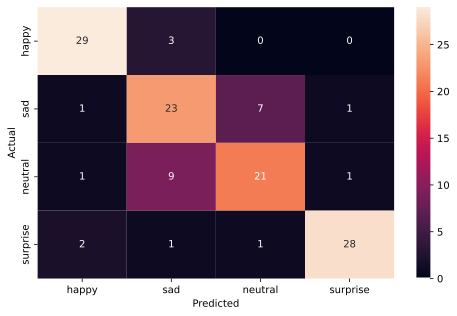

In [ ]:
pred=xgbmodel.predict(test_data)
y_true = test_set.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations and Insights:**

We see that: 

1. Combination of CNN model derived from model 4 + XGBoost classifier gives us even better performance than model4 with ANN Classifier. Validation accuracy increased from 74.34 to 76%. Which comes very close to the top benchmark performance of 76.82% achieved by "Ensemble ResMaskingNet with 6 other CNNs" on FER2013 dataset and surpasses top 2 result of 75.42% reported on the same dataset (https://paperswithcode.com/sota/facial-expression-recognition-on-fer2013). This is very good performance. Test accuracy also improved from 78 to 79%. 
2. Model is on the verge of overfitting with 86% training accuracy vs 76% of validation accuracy. So additional regularization is needed to lower this difference.
3. At the same time this model looks as the most promising now. 
4. The behaviour of the model on classification report and confusion matrix is very similar to model4. 
5. We choose CNN + XGBoost classifier as our final model for tweaking and regularization. If we fail to reduce overfitting, then we resort to the model 4.

## **Pre-Final Conclusion:**
We found very promising model combining CNN + XGBoost classifier which we will use for final regularization and will try to improve it's performance further. 

### **Refined insights**:

1. The model is a bit overfitting so additional regularization is needed. 
2. At the same time the model shows spectacular performance with validation accuracy of 76%.  Which comes very close to the top benchmark performance of 76.82% achieved by "Ensemble ResMaskingNet with 6 other CNNs" on FER2013 dataset and surpasses top 2 result of 75.42% reported on the same dataset (https://paperswithcode.com/sota/facial-expression-recognition-on-fer2013). The test accuracy is 79%. Which can be considered as impressing result.  
3. The validation accuracy of the final model surpasses human accuracy for recognizing facial emotions confirmed by research: 76% vs 72% (https://www.ucl.ac.uk/news/2020/apr/artificial-intelligence-still-lags-behind-humans-recognising-emotions). 
4. From the classification report we see that best F1 performance is achieved on the happy and surprise classes and the performance on the sad and neutral classes is worse. 
5. Precision and recall is very close for all the corresponding classes. 
6. The biggest confusion for the model is caused by the sad and neutral classes, because the model confuses this classes to each other the most. This is very similar to the behaviour of CNN model3 and model4 built from scratch. 


### **Comparison of various techniques and their relative performance**:

1. The transfer learning approach using VGG16, Resnet101, EfficientNetV2B2 and EfficientNetV2L didn't prove to be successful on our dataset. The best validation accuracy of 59.71% is achieved on EfficientNetV2B2 which is very far from the best performance of 76% achieved on the models build from scratch. The probable reasons are:
 - pretrained models were trained on RGB ImageNet dataset and we have GrayScale dataset
 - our images are a lot smaller than the images in ImageNet (48x48 vs 224x224)

  but more research is needed.
2. Model3, model4 and CNN part of model4 + XGBoost classifier were showing progressively better validation and test accuracies. At the same time model4 + XGBoost shows some overfitting which should be adressed with further regularization, which can lead to better performance of the model. 

### **Proposal for the final solution design**:

I propose to adopt Model 4 CNN part + XGBoost Classifier as it showed the best validation and test accuracies. If we can't reduce overfitting of this model with regularization we resort to model 4 as it showed the second best validation and test accuracies. 

### **////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////**

## **My plan is to:**

1. Check robustness of the model4 and prefinally selected model4-CNN + XGBoost Classifier.
2. Try to regularize model4-CNN + XGBoost to mitigate signs of overfitting and potentially increase its performance further.
3. Write Final Conclusions and potential Next Steps. 

## **New data collection**

To check the roubustness of the model I collected new test images from FER2013 which consists of similar type images (GrayScale, 48x48) labeled with facial emotions. Most of the pictures from FER2013 were used in our initial datasets on which we had trained, validated and tested our models. But there were approximately 3000 unique images of class happy, ~ 900 unique images of classes sad and neutral and no unique images in class surprise. 

So I:
-  Balanced classes happy, neutral and sad to ~ 900 pictures in each category 
-  Parsed ~ 900 images with surprised faces from google search 
-  Manually cleaned collected images from irrelevant ones.
-  Cleaned surprised set from all duplicates

The next step is to convert surprised images to GrayScale and  to resize them to 48x48. So let's do it. 

In [ ]:
# Let's import necessary libraries
import cv2
import glob
import os

In [ ]:
# Let's mount google drive to upload image set
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Let's download the images, convert them to GrayScale and resize to 48x48
for filename in glob.glob(r'/content/drive/MyDrive/Colab Notebooks/Facial Detection/Surprised/*.jpg'):
    img=cv2.imread(filename) 
    rl=cv2.resize(img, (48,48))
    gray_image = cv2.cvtColor(rl, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(os.path.join(r'/content/drive/MyDrive/Colab Notebooks/Facial Detection/Surprised Processed/', os.path.basename(filename)) , gray_image)
# That's it

The final surprised class for test consists of 432 images. The problem is that many of the images are not cropped to just face as its done in FER2013 dataset. So to balance a bit the surprised class I added ~ 450 images from FER2013.

Now all the classes in the new test data set consist of ~ 900 images.
The big advantage of this Data Set that it's quite big, it's ~ 23% of the training set. So it will be better test for our models than the initial Test Set which was only ~ 0.8% of the Training Set and couldn't prove the models to be robust. 

# **Lets check robustness of our pre-final model on a new Test Set**

In [ ]:
# Let's load the earlier saved model 4
from tensorflow import keras
model4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model4')

In [ ]:
# Let's see the model summary to choose a layer for intermediate model
# to connect with XGBoost
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 128)      

In [ ]:
# Let's create intermediate model

intermediate_layer_model = Model(inputs=model4.input,
                                 outputs=model4.get_layer('dense_3').output)

intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5_input (InputLayer)  [(None, 48, 48, 1)]      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 64)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 24, 24, 64)        0     

In [ ]:
# Let's create datasets for the model to fit XGBoost Classifier. 

# Let's figure out what is the number of test pictures
test_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'test'))
train_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path+'train'))

batch_size=32

img_size = 48

datagen_train = ImageDataGenerator(rescale = 1./255)

train_set = datagen_train.flow_from_directory(folder_path + "train",
                                              target_size = (img_size, img_size),
                                              color_mode = 'grayscale',
                                              batch_size = batch_size,
                                              class_mode = 'categorical',
                                              classes = ['happy', 'sad', 'neutral', 'surprise'],
                                              shuffle = False)


datagen_validation = ImageDataGenerator(rescale = 1./255)

validation_set = datagen_validation.flow_from_directory(folder_path + "validation",
                                                        target_size= (img_size,img_size),
                                                        color_mode ='grayscale',
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        classes = ['happy', 'sad','neutral','surprise'],
                                                        shuffle = False)

datagen_test = ImageDataGenerator(rescale=1./255)

test_set = datagen_test.flow_from_directory(folder_path + 'test',
                                            target_size= (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size=test_image_count,
                                            class_mode = 'categorical',
                                            classes = ['happy','sad','neutral','surprise'],
                                            shuffle = False)

Found 15109 images belonging to 4 classes.
Found 4977 images belonging to 4 classes.
Found 128 images belonging to 4 classes.


In [ ]:
# Let's create outputs on the intermediate model to feed to XGBoost
intermediate_output=intermediate_layer_model.predict(train_set)

In [ ]:
intermediate_output=pd.DataFrame(data=intermediate_output)

In [ ]:
# Let's check the intermediate output
intermediate_output

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,5.799787,-0.867225,-26.017677,5.219923,2.886110,7.572069,-13.639708,3.878557,3.843500,-16.391233,...,2.035530,2.770886,5.889526,-22.041212,-1.284610,-6.219868,-3.574503,2.287618,-15.119143,-2.815572
1,-78.704353,-75.598206,34.984001,1.260047,-101.515640,-86.975929,-37.721321,-21.048925,10.000986,-47.662235,...,2.601296,-7.097738,-46.414085,6.888260,-40.206944,59.636005,-45.563549,64.836319,-63.427467,51.120972
2,-42.578552,-73.032616,12.305219,-24.547104,-53.795902,-54.469341,-43.344421,-14.628231,6.251421,-33.250519,...,14.574936,-2.642499,-69.849419,17.048901,-12.208355,52.740223,-42.991440,26.603374,-70.048218,-8.569519
3,-15.157745,-17.923840,9.667524,0.020379,-18.143461,-25.775581,-11.382079,-1.030839,3.058178,-4.626091,...,-3.581802,-1.397567,-9.685002,4.217752,-11.901306,18.135406,-5.589415,11.124277,-9.494690,8.211908
4,-38.000607,-76.890144,10.541101,-0.935161,-57.398335,-59.820629,-73.740700,-11.325030,32.752434,-39.399605,...,15.725128,3.631092,-50.003662,6.639267,-12.487746,53.973629,-70.413399,43.226822,-93.555115,-6.408666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15104,-35.262840,-50.011978,4.513647,-61.587696,12.811800,-65.858612,4.677186,31.764824,-52.038044,27.495331,...,-61.555721,-15.467643,-52.659164,10.301134,10.432403,46.471382,29.568869,-88.306831,0.830091,-36.395847
15105,-95.609024,-144.206024,7.189331,-144.179413,36.378815,-133.164505,27.124842,75.974083,-129.124557,39.793304,...,-137.378723,-27.898085,-131.392288,19.595289,22.703358,100.099930,82.257851,-202.202499,0.317381,-133.472809
15106,-102.440826,-129.576324,18.341961,-130.110245,32.359901,-144.124069,22.944780,46.989807,-137.849976,10.911811,...,-90.648621,-27.177694,-120.779335,32.181969,26.434034,96.868942,75.207001,-156.101501,3.087758,-78.104584
15107,-130.463028,-160.802582,15.218560,-167.022339,29.713192,-173.506729,43.134987,82.382561,-167.901398,32.064011,...,-148.149582,-27.045347,-148.330719,52.470917,25.586746,102.376884,97.175339,-208.110504,-2.347471,-121.466393


In [ ]:
# Let's load and fit the XGBoost Classifier
from xgboost import XGBClassifier
xgbmodel=XGBClassifier(objective='multi:softprob',
                       num_class=4)
xgbmodel.fit(intermediate_output,train_set.labels)

XGBClassifier(num_class=4, objective='multi:softprob')

In [ ]:
# Let's check the training performance of the fitted model
train_data=intermediate_layer_model.predict(train_set)
train_data=pd.DataFrame(data=train_data)

In [ ]:
pred=xgbmodel.predict(train_data)
y_true = train_set.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

              precision    recall  f1-score   support

       happy       0.91      0.91      0.91      3976
         sad       0.81      0.81      0.81      3982
     neutral       0.79      0.80      0.79      3978
    surprise       0.94      0.94      0.94      3173

    accuracy                           0.86     15109
   macro avg       0.86      0.86      0.86     15109
weighted avg       0.86      0.86      0.86     15109



In [ ]:
# Let's check validation performance of the fitted model
validation_data=intermediate_layer_model.predict(validation_set)
validation_data=pd.DataFrame(data=validation_data)

In [ ]:
pred=xgbmodel.predict(validation_data)
y_true = validation_set.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

              precision    recall  f1-score   support

       happy       0.88      0.83      0.86      1825
         sad       0.64      0.67      0.66      1139
     neutral       0.66      0.67      0.66      1216
    surprise       0.82      0.85      0.84       797

    accuracy                           0.76      4977
   macro avg       0.75      0.76      0.75      4977
weighted avg       0.76      0.76      0.76      4977



In [ ]:
# Let's check test performance of the fitted model
test_data=intermediate_layer_model.predict(test_set)
test_data=pd.DataFrame(data=test_data)

              precision    recall  f1-score   support

       happy       0.88      0.91      0.89        32
         sad       0.64      0.72      0.68        32
     neutral       0.72      0.66      0.69        32
    surprise       0.93      0.88      0.90        32

    accuracy                           0.79       128
   macro avg       0.79      0.79      0.79       128
weighted avg       0.79      0.79      0.79       128



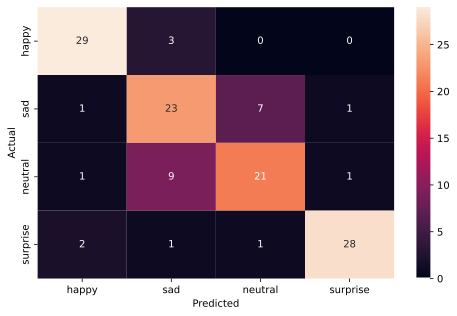

In [ ]:
# Let's make the predictions
pred=xgbmodel.predict(test_data)
y_true = test_set.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Let's save the model
xgbmodel.save_model('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/XGBoost-Model4.json')

### **Let's check the model on the New Test Set**

In [ ]:
# Storing the path of the data file from the Google drive to the new Test Dataset
path = '/content/drive/MyDrive/Colab Notebooks/Facial Detection/DataSets/Test images collected from FER2013  - Facial_emotion_images + parsed from internet (Surprise class).zip'

# The data is provided as a zip file so we need to extract the files from the zip file
with zipfile.ZipFile(path, 'r') as zip_ref:
    zip_ref.extractall()

In [ ]:
picture_size = 48
folder_path = "Test images collected from FER2013  - Facial_emotion_images + parsed from internet (Surprise class)/"

In [ ]:
# Let's figure out what is the number of test pictures
test_image_count = sum(len(files) for 
                       _, _, files in os.walk(folder_path))

img_size = 48

datagen_test_add = ImageDataGenerator(rescale=1./255)

test_set_add = datagen_test_add.flow_from_directory(folder_path,
                                            target_size= (img_size,img_size),
                                            color_mode = 'grayscale',
                                            batch_size=test_image_count,
                                            class_mode = 'categorical',
                                            classes = ['happy','sad','neutral','surprise'],
                                            shuffle = False)

Found 3534 images belonging to 4 classes.


In [ ]:
# Let's load the saved CNN + XGBoost model
from xgboost import XGBClassifier

xgbmodel=XGBClassifier()
xgbmodel.load_model('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/XGBoost-Model4.json')

In [ ]:
# Let's load the earlier saved model 4
from tensorflow import keras
model4 = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/Facial Detection/Saved Models/model4')

In [ ]:
# Let's create intermediate model

intermediate_layer_model = Model(inputs=model4.input,
                                 outputs=model4.get_layer('dense_3').output)

In [ ]:
# Let's check performance of the model on additional test dataset
test_data=intermediate_layer_model.predict(test_set_add)
test_data=pd.DataFrame(data=test_data)

              precision    recall  f1-score   support

       happy       0.79      0.80      0.79       904
         sad       0.51      0.63      0.56       862
     neutral       0.62      0.65      0.63       910
    surprise       0.84      0.57      0.68       858

    accuracy                           0.66      3534
   macro avg       0.69      0.66      0.67      3534
weighted avg       0.69      0.66      0.67      3534



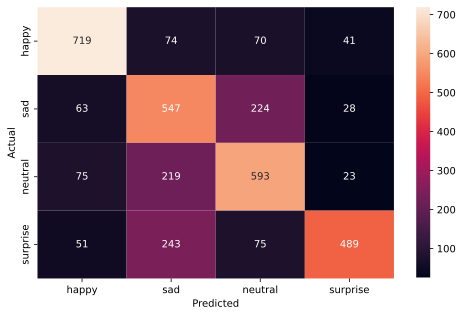

In [ ]:
pred=xgbmodel.predict(test_data)
y_true = test_set_add.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

              precision    recall  f1-score   support

       happy       0.88      0.91      0.89        32
         sad       0.64      0.72      0.68        32
     neutral       0.72      0.66      0.69        32
    surprise       0.93      0.88      0.90        32

    accuracy                           0.79       128
   macro avg       0.79      0.79      0.79       128
weighted avg       0.79      0.79      0.79       128



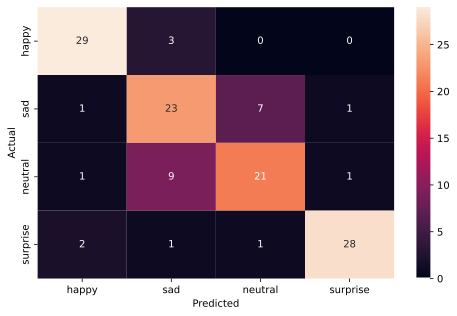

In [ ]:
# The results of the model on the initial test set 

**Observations and Insights:**

We see that: 

1. The performance of the model on the new Test set dropped on all classes to average accuracy from 79% to 66%. That means that our model is not robust. 
2. The F1 score has dropped the least on the neutral class and the most on the surprise class. This drop is  expectable because big part of the surprise class consists of images parsed from the internet which were not cropped to just an image of a face only.  
3. The behaviour of the model on  confusion matrix is very similar to  the previous behavior of the model, but the model now is a lot more confused with the surprise class, confusing it the most with the sad class. Probably it's the nature of the images parsed from the internet.  
4. We should proceed with the regularization of the model and see if we can improve it. 

### **Let's check also the model4 on the New Test Set to see if it's more robust**

In [ ]:
# Let's evaluate model's test performance on the New Test Set
test_images_add,test_labels_add=next(test_set_add)
accuracy=model4.evaluate(test_images_add,test_labels_add,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

111/111 [==============================] - 18s 157ms/step - loss: 0.8501 - accuracy: 0.6658

 Test_Accuracy:- 0.6658177971839905


In [ ]:
# Let's evaluate model's test performance on the initial Test set
test_images,test_labels=next(test_set)
accuracy=model4.evaluate(test_images,test_labels,verbose=1)
print('\n','Test_Accuracy:-',accuracy[1])

4/4 [==============================] - 2s 387ms/step - loss: 0.5420 - accuracy: 0.7812

 Test_Accuracy:- 0.78125


In [ ]:
test_images_add,test_labels_add=next(test_set_add)

              precision    recall  f1-score   support

       happy       0.79      0.80      0.80       904
         sad       0.50      0.62      0.55       862
     neutral       0.63      0.66      0.65       910
    surprise       0.84      0.57      0.68       858

    accuracy                           0.67      3534
   macro avg       0.69      0.66      0.67      3534
weighted avg       0.69      0.67      0.67      3534



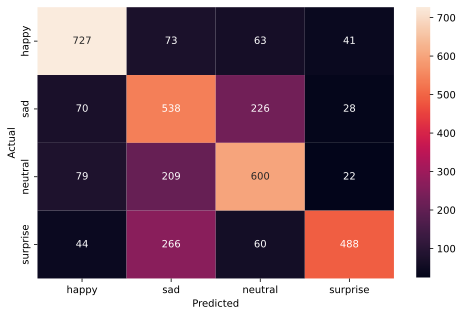

In [ ]:
pred = model4.predict(test_images_add)
pred = np.argmax(pred, axis = 1) 
y_true = np.argmax(test_labels_add, axis = 1)

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

              precision    recall  f1-score   support

       happy       0.85      0.88      0.86        32
         sad       0.67      0.69      0.68        32
     neutral       0.70      0.72      0.71        32
    surprise       0.93      0.84      0.89        32

    accuracy                           0.78       128
   macro avg       0.79      0.78      0.78       128
weighted avg       0.79      0.78      0.78       128



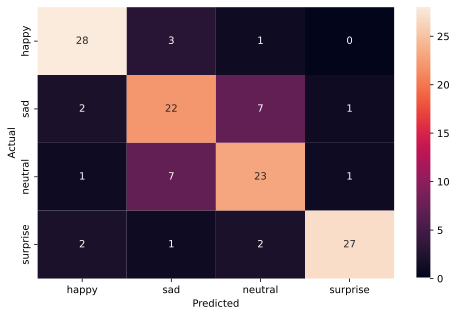

In [ ]:
# The results of the model on the initial test set 

**Observations and Insights:**

We see that: 

1. Model4 shows absolutely the same behavior and results on the new Test Set as pre-finally selected model model4-CNN + XGBoost classifier and also is not as robust as we would like it to be.
2. So let's try to regularize pre-final model and see if we can improve it's results.   

## **Let's regularize the model**

In [ ]:
# Let's get the training data on the intermediate model
train_data=intermediate_layer_model.predict(train_set)
train_data=pd.DataFrame(data=train_data)
train_labels=train_set.labels
train_labels=pd.DataFrame(data=train_labels)

In [ ]:
# Let's get the validation data on the intermediate model
validation_data=intermediate_layer_model.predict(validation_set)
validation_data=pd.DataFrame(data=validation_data)
validation_labels=validation_set.labels
validation_labels=pd.DataFrame(data=validation_labels)

In [ ]:
# As we plan to use cross validation let's combine train and validation data
train_data=pd.concat([train_data,validation_data])

In [ ]:
# Let's do the same for the labels
train_labels=pd.concat([train_labels,validation_labels])

In [ ]:
# Let's import necessary libraries
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import cv
from xgboost import XGBClassifier

In [ ]:
# Let's find optimal number of estimators
param_test1 = {'n_estimators':range(10,50,10)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=4, cv=5)
gsearch1.fit(train_data,train_labels)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     nthread=4, objective='multi:softprob',
                                     seed=27, subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(10, 50, 10)},
             scoring='accuracy')

In [ ]:
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'n_estimators': 40}
0.8217654857349048


**We see that optimal number of estimators is 40**

In [ ]:
# Let's tune max_depth and min_child_weight
param_test2 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1,
 gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'multi:softprob', num_class=4,nthread=4, scale_pos_weight=1,
 n_estimators=40, seed=27), 
 param_grid = param_test2, scoring='accuracy',n_jobs=4, cv=5)
gsearch2.fit(train_data,train_labels)


GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, n_estimators=40,
                                     nthread=4, num_class=4,
                                     objective='multi:softprob', seed=27,
                                     subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy')

In [ ]:
print(gsearch2.best_params_)
print(gsearch2.best_score_)

{'max_depth': 5, 'min_child_weight': 1}
0.8217654857349048


**We see that optimal max_depth is 5 and min_child_weight is 1.**

In [ ]:
# Let's tune gamma
param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch3 = GridSearchCV(estimator = 
                        XGBClassifier( learning_rate =0.1,subsample=0.8,
                                      colsample_bytree=0.8, 
                                      max_depth=gsearch2.best_params_['max_depth'],
                                      min_child_weight=gsearch2.best_params_['min_child_weight'],
                                      objective='multi:softprob',
                                      num_class=4,nthread=4, scale_pos_weight=1,
                                      n_estimators=40, seed=27), 
 param_grid = param_test3, scoring='accuracy',n_jobs=4, cv=5)
gsearch3.fit(train_data,train_labels)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=40, nthread=4, num_class=4,
                                     objective='multi:softprob', seed=27,
                                     subsample=0.8),
             n_jobs=4, param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='accuracy')

In [ ]:
print(gsearch3.best_params_)
print(gsearch3.best_score_)

{'gamma': 0.3}
0.8221139673560092


**The optimal gamma is 0.3**

In [ ]:
# Let's fine-tune subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}

gsearch4 = GridSearchCV(estimator = 
                        XGBClassifier(learning_rate =0.1, 
                                      max_depth=gsearch2.best_params_['max_depth'], 
                                      gamma=gsearch3.best_params_['gamma'],
                                      min_child_weight=gsearch2.best_params_['min_child_weight'],
                                      objective= 'multi:softprob',
                                      num_class=4,nthread=4, scale_pos_weight=1,
                                      n_estimators=40, seed=27), 
 param_grid = param_test4, scoring='accuracy',n_jobs=4, cv=5)
gsearch4.fit(train_data,train_labels)

GridSearchCV(cv=5,
             estimator=XGBClassifier(gamma=0.3, max_depth=5, n_estimators=40,
                                     nthread=4, num_class=4,
                                     objective='multi:softprob', seed=27),
             n_jobs=4,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='accuracy')

In [ ]:
print(gsearch4.best_params_)
print(gsearch4.best_score_)

{'colsample_bytree': 0.7, 'subsample': 0.8}
0.8221636194505855


**The optimal values for colsample_bytree  is 0.7 and subsample is 0.8**

In [ ]:
# Let's fine tune reg_alpha
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}

gsearch5 = GridSearchCV(estimator = 
                        XGBClassifier(learning_rate =0.1,
                                      max_depth=gsearch2.best_params_['max_depth'], 
                                      gamma=gsearch3.best_params_['gamma'],
                                      min_child_weight=gsearch2.best_params_['min_child_weight'],
                                      objective= 'multi:softprob',
                                      num_class=4,nthread=4, scale_pos_weight=1,
                                      n_estimators=40, 
                                      colsample_bytree=gsearch4.best_params_['colsample_bytree'],
                                      subsample=gsearch4.best_params_['subsample'],
                                      seed=27), 
 param_grid = param_test5, scoring='accuracy',n_jobs=4, cv=5)
gsearch5.fit(train_data,train_labels)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.7, gamma=0.3,
                                     max_depth=5, n_estimators=40, nthread=4,
                                     num_class=4, objective='multi:softprob',
                                     seed=27, subsample=0.8),
             n_jobs=4, param_grid={'reg_alpha': [1e-05, 0.01, 0.1, 1, 100]},
             scoring='accuracy')

In [ ]:
print(gsearch5.best_params_)
print(gsearch5.best_score_)

{'reg_alpha': 0.1}
0.8222631714665137


In [ ]:
# Let's fine tune reg_alpha even more by searching optimal value near previously
# found one 
param_test6 = {
 'reg_alpha':[0.025,0.05,0.075,0.1,0.25,0.5,0.75]
}

gsearch6 = GridSearchCV(estimator = 
                        XGBClassifier(learning_rate =0.1,
                                      max_depth=gsearch2.best_params_['max_depth'], 
                                      gamma=gsearch3.best_params_['gamma'],
                                      min_child_weight=gsearch2.best_params_['min_child_weight'],
                                      objective= 'multi:softprob',
                                      num_class=4,nthread=4, scale_pos_weight=1,
                                      n_estimators=40, 
                                      colsample_bytree=gsearch4.best_params_['colsample_bytree'],
                                      subsample=gsearch4.best_params_['subsample'],
                                      seed=27), 
 param_grid = param_test6, scoring='accuracy',n_jobs=4, cv=5)
gsearch6.fit(train_data,train_labels)

GridSearchCV(cv=5,
             estimator=XGBClassifier(colsample_bytree=0.7, gamma=0.3,
                                     max_depth=5, n_estimators=40, nthread=4,
                                     num_class=4, objective='multi:softprob',
                                     seed=27, subsample=0.8),
             n_jobs=4,
             param_grid={'reg_alpha': [0.025, 0.05, 0.075, 0.1, 0.25, 0.5,
                                       0.75]},
             scoring='accuracy')

In [ ]:
print(gsearch6.best_params_)
print(gsearch6.best_score_)

{'reg_alpha': 0.25}
0.8224624365857748


**The optimal reg_alpha is 0.25**

**Now when we found optimal hyper-parameters let's build a Classifier with reduced learning rate and increased number of estimators to find their new optimal number.**

In [ ]:
# Let's reduce learning rate and find new optimal number of estimators

xgbmodel_final=XGBClassifier(learning_rate =0.01, max_depth=5, gamma=0.3,
                                      min_child_weight=1,objective= 'multi:softprob',
                                      num_class=4,nthread=4, scale_pos_weight=1,
                                      n_estimators=3000, colsample_bytree=0.7,
                                      subsample=0.8,reg_alpha=0.25)

In [ ]:
xgb_params = xgbmodel_final.get_xgb_params()
xgtrain = xgb.DMatrix(train_data, train_labels)
cvresult = xgb.cv(xgb_params, xgtrain, num_boost_round=xgbmodel_final.get_params()['n_estimators'], nfold=5,
metrics='merror', early_stopping_rounds=50)
xgbmodel_final.set_params(n_estimators=cvresult.shape[0])

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5,
              n_estimators=26, nthread=4, num_class=4,
              objective='multi:softprob', reg_alpha=0.25, subsample=0.8)

In [ ]:
# The optimal number of estimators is
cvresult.shape[0]

26

In [ ]:
# Let's add  train and validation accuracies to the history
cvresult['Train Accuracy']=1-cvresult['train-merror-mean']
cvresult['Validation Accuracy']=1-cvresult['test-merror-mean']

In [ ]:
# Let's drop unnecessary columns 
cvresult.drop(['train-merror-mean','train-merror-std','test-merror-mean','test-merror-std'],axis=1,inplace=True)

In [ ]:
# Let's see final report on accuracies
cvresult

,Train Accuracy,Validation Accuracy
0,0.834213,0.812008
1,0.837511,0.817286
2,0.839042,0.818431
3,0.840125,0.818680
4,0.840523,0.819626
5,0.840586,0.819875
6,0.841270,0.819875
7,0.841780,0.820024
8,0.841718,0.819128
9,0.842004,0.819825


In [ ]:
# Let's check performance of the model on additional test dataset
test_data_add=intermediate_layer_model.predict(test_set_add)
test_data_add=pd.DataFrame(data=test_data)

In [ ]:
xgbmodel_final=XGBClassifier(learning_rate =0.01, max_depth=5, gamma=0.3,
                                      min_child_weight=1,objective= 'multi:softprob',
                                      num_class=4,nthread=4, scale_pos_weight=1,
                                      n_estimators=26, colsample_bytree=0.7,
                                      subsample=0.8,reg_alpha=0.25)
xgbmodel_final.fit(train_data, train_labels)

XGBClassifier(colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5,
              n_estimators=26, nthread=4, num_class=4,
              objective='multi:softprob', reg_alpha=0.25, subsample=0.8)

              precision    recall  f1-score   support

       happy       0.79      0.81      0.80       904
         sad       0.51      0.64      0.57       862
     neutral       0.62      0.65      0.64       910
    surprise       0.87      0.58      0.69       858

    accuracy                           0.67      3534
   macro avg       0.70      0.67      0.67      3534
weighted avg       0.70      0.67      0.68      3534



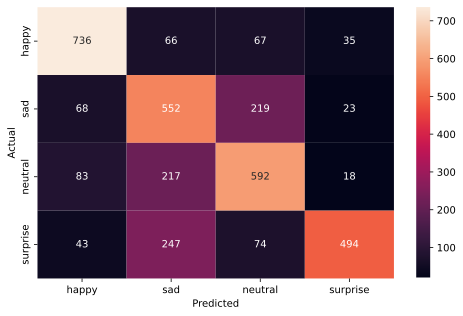

In [ ]:
pred=xgbmodel_final.predict(test_data_add)
y_true = test_set_add.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
# Let's check test performance of the fitted model on initial test set
test_data=intermediate_layer_model.predict(test_set)
test_data=pd.DataFrame(data=test_data)

              precision    recall  f1-score   support

       happy       0.85      0.88      0.86        32
         sad       0.64      0.66      0.65        32
     neutral       0.69      0.69      0.69        32
    surprise       0.93      0.88      0.90        32

    accuracy                           0.77       128
   macro avg       0.78      0.77      0.77       128
weighted avg       0.78      0.77      0.77       128



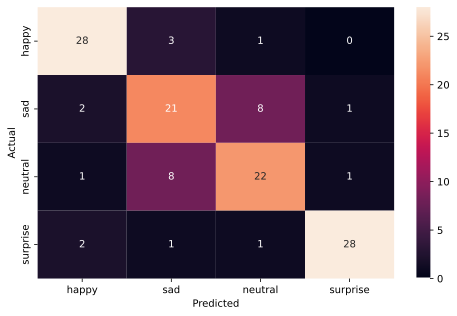

In [ ]:
# Let's make the predictions
pred=xgbmodel_final.predict(test_data)
y_true = test_set.labels

# Printing the classification report
print(classification_report(y_true, pred,target_names=['happy', 'sad', 'neutral', 'surprise']))

# Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_true, pred)
plt.figure(figsize = (8, 5))
sns.heatmap(cm, annot = True,  fmt = '.0f',
            xticklabels = ['happy', 'sad', 'neutral', 'surprise'], 
            yticklabels = ['happy', 'sad', 'neutral', 'surprise'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## **Final Conclusions:**

1. Fine-Tuned CNN+XGBoost model shows no signs of overfitting on training and validation accuracy, giving the best results among the models explored: 84.34% training accuracy and 82.22% validation accuracy. This surpasses the top benchmark on similar FER2013 dataset of 76.82% achieved by "Ensemble ResMaskingNet with 6 other CNNs"(https://paperswithcode.com/sota/facial-expression-recognition-on-fer2013). This is impressing and encouraging result. 
2. The validation accuracy of the final model surpasses human accuracy for recognizing facial emotions confirmed by research: 82.22% vs 72% (https://www.ucl.ac.uk/news/2020/apr/artificial-intelligence-still-lags-behind-humans-recognising-emotions).  
2. At the same time we see that on a new test set accuracy drops to 67%. Probably it's due to the fact that part of the images was parsed from internet and were not cropped to  just face image. Also probably images from 
FER2013 used for this dataset were different in a some way. More research is needed to explore it. The same results we see with model4 (CNN + ANN).
3. From the classification report we see that best F1 performance is achieved on the happy and surprise classes and the performance on the sad and neutral classes is worse.
4. Precision and recall are very similar for happy and neutral classes and for sad and surprise classes it varies.   
5. The behaviour of the model on  confusion matrix is very similar to the  behavior of the pre-final CNN + XGBoost model: the biggest confusion is caused by the sad and neutral classes, because the model confuses this classes to each other the most. 
6. But now the model is a lot more confused with the surprise class, confusing it the most with the sad class. Probably it's the nature of the images parsed from the internet. More research is needed on that.    


### **Comparison of various techniques and their relative performance**:

1. The transfer learning approach using VGG16, Resnet101, EfficientNetV2B2 and EfficientNetV2L didn't prove to be successful on our dataset. The best validation accuracy of 59.71% is achieved on EfficientNetV2B2 which is very far from the best performance of 82.22% achieved on the models build from scratch. The probable reasons are:
 - pretrained models were trained on RGB ImageNet dataset and we have GrayScale dataset
 - our images are a lot smaller than the images in ImageNet (48x48 vs 224x224)

  but more research is needed.
2. Model3, model4 and CNN part of model4 + XGBoost classifier and fine-tuned model4 + XGBoost were showing progressively better validation. 

3. The fact that best performance was achieved with XGBoost Classifier can be explained that this model has huge potential for fine-tuning and regularization compared to the ANN we used. 

4. We can fine-tune xgbmodel_final even more with new data collected and improve its results.

### **Proposal for the final solution design**:

I propose to adopt xgbmodel_final as it showed the best validation and test accuracies and has potential for futher fine-tuning, optimization and can be trained faster than model with ANN classifier.   